# Import Library

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import math
import squarify
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Data Handling

# Load Data

In [2]:
df = pd.read_csv('Processed_Flipdata - Processed_Flipdata.csv')

In [3]:
df

Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
0             0        Infinix SMART 7     Night Black      64    4      6000   
1             1        Infinix SMART 7      Azure Blue      64    4      6000   
2             2           MOTOROLA G32    Mineral Gray     128    8      5000   
3             3               POCO C50      Royal Blue      32    2      5000   
4             4        Infinix HOT 30i        Marigold     128    8      5000   
..          ...                    ...             ...     ...  ...       ...   
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

    Rear Camera Front Camera  AI Lens  Mobile Height  \
0          13MP          5MP        1          16.76   
1          13MP          5MP        1          16.76   
2          50MP         16MP        0          16.64   
3           8MP          5MP        0          16.56   
4          50MP          5MP        1          16.76   
..          ...          ...      ...            ...   
536        50MP         12MP        0          15.49   
537         5MP          2MP        0          12.70   
538        50MP          8MP        0          16.76   
539        50MP         32MP        0          16.26   
540        50MP          8MP        0          16.66   

                      Processor_   Prize  
0     Unisoc Spreadtrum SC9863A1   7,299  
1     Unisoc Spreadtrum SC9863A1   7,299  
2        Qualcomm Snapdragon 680  11,999  
3             Mediatek Helio A22   5,649  
4                            G37   8,999  
..                           ...     ...  
536  Qualcomm Snapdragon 8 Gen 2  79,999  
537                    Octa Core   5,998  
538           MediaTek Helio G35   9,990  
539      Exynos 1380, Octa Core   38,999  
540           Mediatek Helio G35  15,999  

[541 rows x 12 columns]

# Display Data Sheet

# Performing The EDA on Data Sheet

In [4]:
# Display Basic Information 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [6]:
df.head(10)

Unnamed: 0            Model         Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7    Night Black      64    4      6000   
1           1  Infinix SMART 7     Azure Blue      64    4      6000   
2           2     MOTOROLA G32   Mineral Gray     128    8      5000   
3           3         POCO C50     Royal Blue      32    2      5000   
4           4  Infinix HOT 30i       Marigold     128    8      5000   
5           5  Infinix HOT 30i   Glacier Blue     128    8      5000   
6           6  Infinix HOT 30i   Mirror Black     128    8      5000   
7           7  Infinix HOT 30i  Diamond White     128    8      5000   
8           8  Infinix HOT 30i  Diamond White      64    4      5000   
9           9  Infinix HOT 30i   Mirror Black      64    4      5000   

  Rear Camera Front Camera  AI Lens  Mobile Height  \
0        13MP          5MP        1          16.76   
1        13MP          5MP        1          16.76   
2        50MP         16MP        0          16.64   
3         8MP          5MP        0          16.56   
4        50MP          5MP        1          16.76   
5        50MP          5MP        1          16.76   
6        50MP          5MP        1          16.76   
7        50MP          5MP        1          16.76   
8        50MP          5MP        1          16.76   
9        50MP          5MP        1          16.76   

                   Processor_   Prize  
0  Unisoc Spreadtrum SC9863A1   7,299  
1  Unisoc Spreadtrum SC9863A1   7,299  
2     Qualcomm Snapdragon 680  11,999  
3          Mediatek Helio A22   5,649  
4                         G37   8,999  
5                         G37   8,999  
6                         G37   8,999  
7                         G37   8,999  
8                         G37   7,999  
9                         G37   7,999

In [7]:
# displays the first 10 rows 

In [8]:
df.tail(10)

Unnamed: 0                  Model           Colour  Memory  RAM  \
531         628          OPPO F21s Pro  Starlight Black     128    8   
532         631        APPLE iPhone 12             Blue      64    8   
533         632     SAMSUNG Galaxy A13            Peach     128    6   
534         633         Nokia G11 Plus             Grey      64    4   
535         636    SAMSUNG Galaxy A04e       Light Blue      64    3   
536         637  SAMSUNG Galaxy S23 5G            Cream     256    8   
537         638               LAVA Z21             Cyan      32    2   
538         639         Tecno Spark 8T   Turquoise Cyan      64    4   
539         641  SAMSUNG Galaxy A54 5G     Awesome Lime     128    8   
540         642               OPPO A77         Sky Blue     128    4   

     Battery_ Rear Camera Front Camera  AI Lens  Mobile Height  \
531      4500        64MP         16MP        0          16.33   
532      2815        12MP         12MP        0          15.49   
533      5000        50MP          8MP        0          16.76   
534      5000        50MP          8MP        0          16.55   
535      5000        13MP          5MP        0          16.51   
536      3900        50MP         12MP        0          15.49   
537      3100         5MP          2MP        0          12.70   
538      5000        50MP          8MP        0          16.76   
539      5000        50MP         32MP        0          16.26   
540      5000        50MP          8MP        0          16.66   

                                   Processor_   Prize  
531  Qualcomm SM6225 Snapdragon 680 4G (6 nm)  20,890  
532                                       ios  53,999  
533                          Exynos Octa Core  16,499  
534                                 Octa Core   9,790  
535                        Mediatek Helio P35   9,999  
536               Qualcomm Snapdragon 8 Gen 2  79,999  
537                                 Octa Core   5,998  
538                        MediaTek Helio G35   9,990  
539                   Exynos 1380, Octa Core   38,999  
540                        Mediatek Helio G35  15,999

In [9]:
# displays the Last  10 rows 

In [10]:
print('\nCheck the size  :\n',df.shape)


Check the size  :
 (541, 12)


In [11]:
df.describe().T

count         mean         std    min      25%      50%  \
Unnamed: 0     541.0   289.711645  182.359185    0.0   135.00   273.00   
Memory         541.0   110.550832   60.600694   16.0    64.00   128.00   
RAM            541.0     5.397412    1.984923    2.0     4.00     6.00   
Battery_       541.0  4871.587800  780.148862  800.0  5000.00  5000.00   
AI Lens        541.0     0.062847    0.242911    0.0     0.00     0.00   
Mobile Height  541.0    16.431201    2.523553    4.5    16.51    16.71   

                   75%      max  
Unnamed: 0      434.00   642.00  
Memory          128.00   256.00  
RAM               8.00     8.00  
Battery_       5000.00  7000.00  
AI Lens           0.00     1.00  
Mobile Height    16.94    41.94

In [12]:
# summary statistics for all numerical columns

In [13]:
df.describe(exclude=['number']).T

count unique                      top freq
Model          541    187                 vivo Y16    9
Colour         541    275                   Yellow   12
Rear Camera    541     14                     50MP  260
Front Camera   541     13                     16MP  164
Processor_     541    123  Qualcomm Snapdragon 680   33
Prize          541    158                   15,999   23

In [14]:
# Excludes numerical columns and summary statistics for categorical columns.

In [15]:
print('\nDrop Unwanted Column:\n',df.drop('Unnamed: 0',axis=1,inplace=True))


Drop Unwanted Column:
 None


In [16]:
df

Model          Colour  Memory  RAM  Battery_ Rear Camera  \
0          Infinix SMART 7     Night Black      64    4      6000        13MP   
1          Infinix SMART 7      Azure Blue      64    4      6000        13MP   
2             MOTOROLA G32    Mineral Gray     128    8      5000        50MP   
3                 POCO C50      Royal Blue      32    2      5000         8MP   
4          Infinix HOT 30i        Marigold     128    8      5000        50MP   
..                     ...             ...     ...  ...       ...         ...   
536  SAMSUNG Galaxy S23 5G           Cream     256    8      3900        50MP   
537               LAVA Z21            Cyan      32    2      3100         5MP   
538         Tecno Spark 8T  Turquoise Cyan      64    4      5000        50MP   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000        50MP   
540               OPPO A77        Sky Blue     128    4      5000        50MP   

    Front Camera  AI Lens  Mobile Height                   Processor_   Prize  
0            5MP        1          16.76   Unisoc Spreadtrum SC9863A1   7,299  
1            5MP        1          16.76   Unisoc Spreadtrum SC9863A1   7,299  
2           16MP        0          16.64      Qualcomm Snapdragon 680  11,999  
3            5MP        0          16.56           Mediatek Helio A22   5,649  
4            5MP        1          16.76                          G37   8,999  
..           ...      ...            ...                          ...     ...  
536         12MP        0          15.49  Qualcomm Snapdragon 8 Gen 2  79,999  
537          2MP        0          12.70                    Octa Core   5,998  
538          8MP        0          16.76           MediaTek Helio G35   9,990  
539         32MP        0          16.26      Exynos 1380, Octa Core   38,999  
540          8MP        0          16.66           Mediatek Helio G35  15,999  

[541 rows x 11 columns]

In [17]:
# Display After Drop Unwanted  Column

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 46.6+ KB


In [19]:
# Checking For Data Types Of the all Columns 

In [20]:
df.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [21]:
# Check for null and Missing  Values

In [22]:
print('\nChecking Duplicate Values:\n',df.duplicated().sum())


Checking Duplicate Values:
 10


In [23]:
# Check Duplicate Values

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
# Remove Duplicate Values

In [26]:
df.duplicated().sum()

0

In [27]:
# After Remove Check Duplicate Values

In [28]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

In [29]:
# Select numerical columns

In [30]:
print('\nDisplay Numerical Column:\n',num_cols)


Display Numerical Column:
 Index(['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height'], dtype='object')


In [31]:
# Display Numerical Column

# Visualize Checking Outliers Using Box Plot

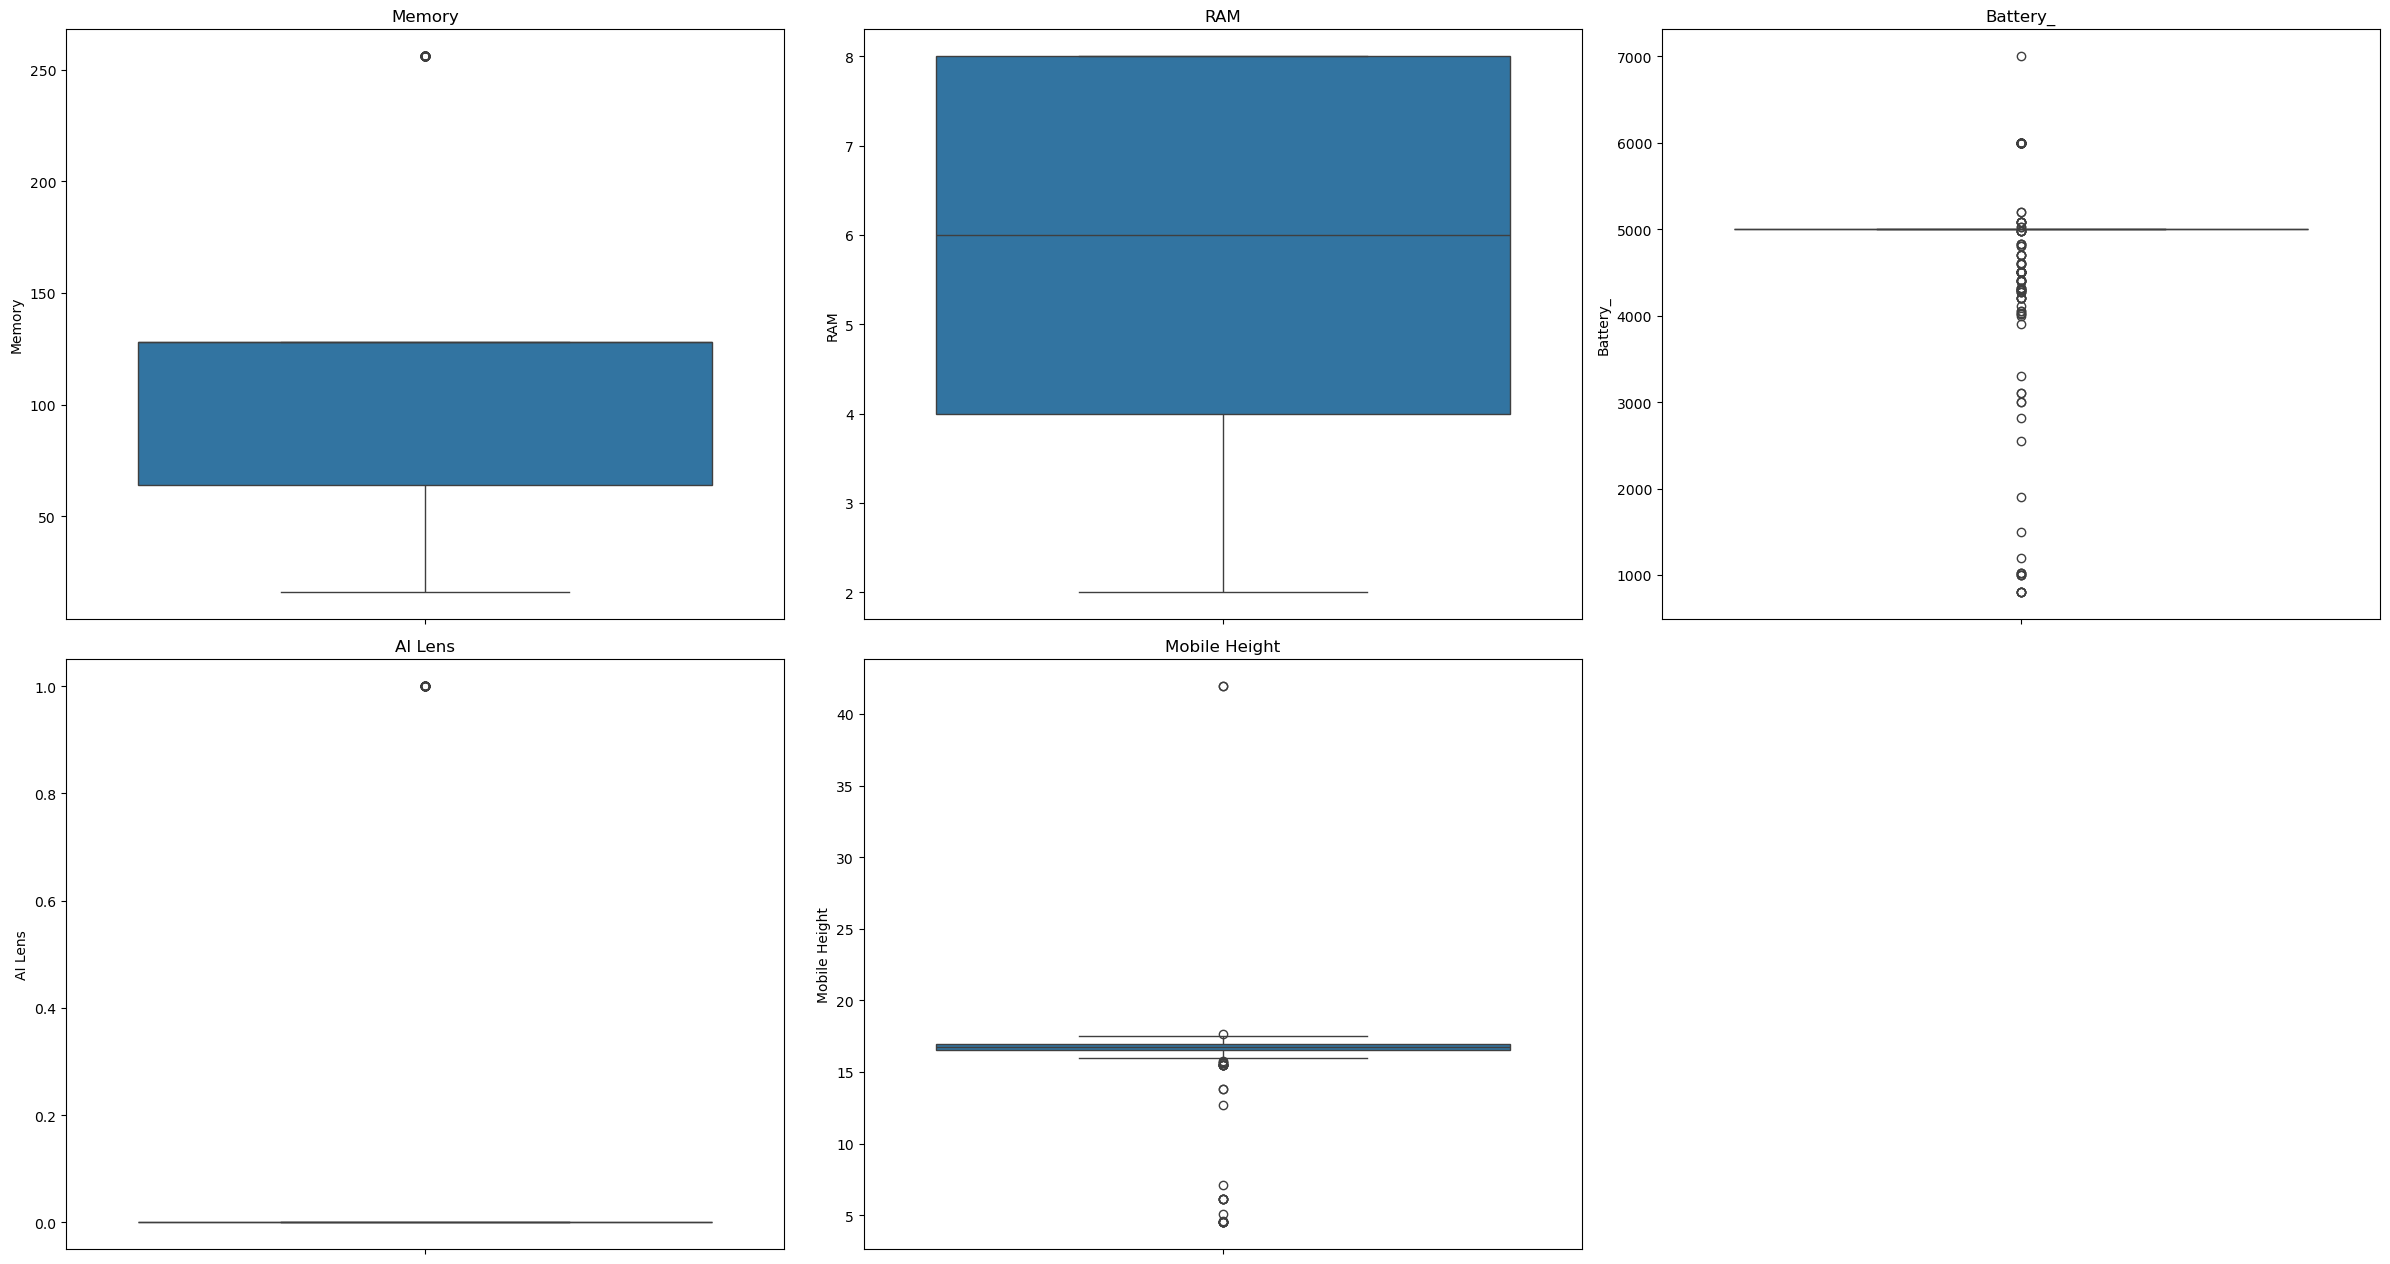

In [32]:
plt.figure(figsize=(24, 19))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # Creates a grid of 3x3 subplots
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [33]:
# Find Outlier

# Handling Outlier

In [34]:
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    # Calculate quantiles
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.50)  # Median (not needed for outlier detection, but useful)
    Q3 = df[col].quantile(0.75)

    # Calculate Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate Lower and Upper bounds for outliers
    LL = Q1 - 1.5 * IQR  # Lower Limit
    UL = Q3 + 1.5 * IQR  # Upper Limit

    # Remove outliers
    df = df[(df[col] >= LL) & (df[col] <= UL)]

print("Outliers removed successfully!")

Outliers removed successfully!


In [35]:
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.50) 
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LL = Q1 - 1.5 * IQR  # Lower Limit
    UL = Q3 + 1.5 * IQR  # Upper Limit

    # Print statistical details
    print(f"\nColumn: {col}")
    print(f"Q1: {Q1}, Median (Q2): {Q2}, Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Limit: {LL}, Upper Limit: {UL}")

    # Count number of outliers
    num_outliers = df[(df[col] < LL) | (df[col] > UL)].shape[0]
    print(f"Number of outliers: {num_outliers}")

    # Handle outliers by replacing them with the mean of the column
    df[col] = np.where((df[col] < LL) | (df[col] > UL), df[col].mean(), df[col])

print("\nOutlier handling completed successfully! ")

# Iterate over numeric columns
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    
    # Calculate quartiles and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR

    # Count outliers before imputation
    num_outliers = df[(df[col] < LL) | (df[col] > UL)].shape[0]
    print(f"\nColumn: {col}")
    print(f"Number of outliers before imputation: {num_outliers}")

    # Impute outliers with column mean
    df[col] = np.where((df[col] < LL) | (df[col] > UL), df[col].mean(), df[col])

    # Count outliers after imputation
    num_outliers_after = df[(df[col] < LL) | (df[col] > UL)].shape[0]
    print(f"Number of outliers after imputation: {num_outliers_after}")

    # Add spacing for readability
    print("\n" + "-" * 50 + "\n")

print("Outlier handling completed! ")

import numpy as np

# Replace negative values in "AI Lens" with the column median
df["AI Lens"] = np.where(df["AI Lens"] < 0, df["AI Lens"].median(), df["AI Lens"])

# Define an IQR-based function to calculate outlier limits
def iqr_technique(column):
    Q1 = np.percentile(column, 25)  # 25th percentile
    Q3 = np.percentile(column, 75)  # 75th percentile
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return lower_bound, upper_bound

# Apply the IQR function to "Mobile Height" column
lower_limit, upper_limit = iqr_technique(df["Mobile Height"])

# Print the calculated thresholds
print(f"Lower IQR Limit: {lower_limit}, Upper IQR Limit: {upper_limit}")


Column: Memory
Q1: 64.0, Median (Q2): 96.0, Q3: 128.0
IQR: 64.0
Lower Limit: -32.0, Upper Limit: 224.0
Number of outliers: 0

Column: RAM
Q1: 4.0, Median (Q2): 4.0, Q3: 6.0
IQR: 2.0
Lower Limit: 1.0, Upper Limit: 9.0
Number of outliers: 0

Column: Battery_
Q1: 5000.0, Median (Q2): 5000.0, Q3: 5000.0
IQR: 0.0
Lower Limit: 5000.0, Upper Limit: 5000.0
Number of outliers: 0

Column: AI Lens
Q1: 0.0, Median (Q2): 0.0, Q3: 0.0
IQR: 0.0
Lower Limit: 0.0, Upper Limit: 0.0
Number of outliers: 0

Column: Mobile Height
Q1: 16.51, Median (Q2): 16.71, Q3: 16.76
IQR: 0.25
Lower Limit: 16.135, Upper Limit: 17.135
Number of outliers: 0

Outlier handling completed successfully! 

Column: Memory
Number of outliers before imputation: 0
Number of outliers after imputation: 0

--------------------------------------------------


Column: RAM
Number of outliers before imputation: 0
Number of outliers after imputation: 0

--------------------------------------------------


Column: Battery_
Number of outlier

# Visualize Data After Outlier Removal

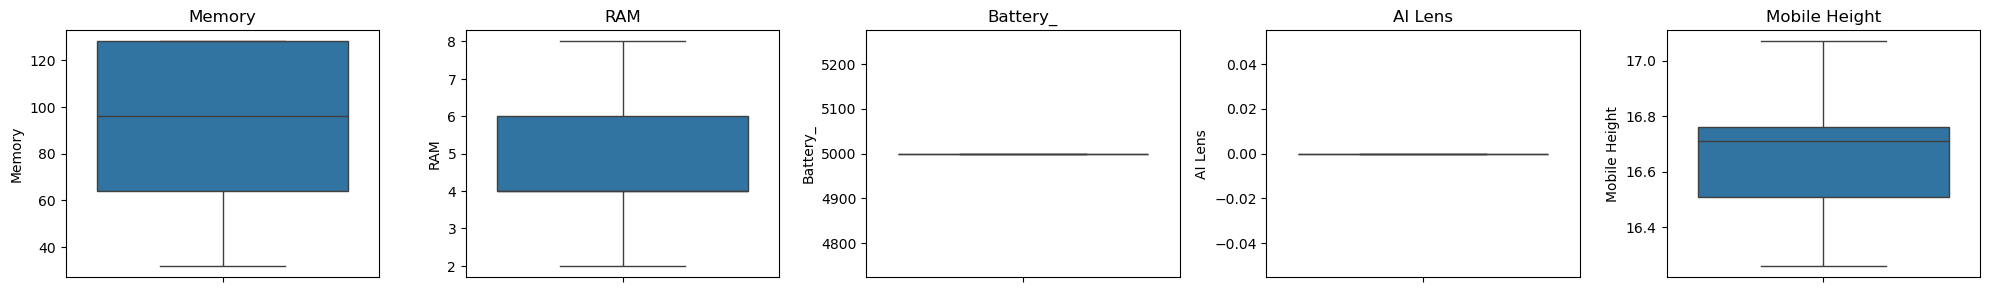

In [36]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(24, 19))
for i, col in enumerate(num_cols, 1):
    plt.subplot(7, 6, i)  
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()  
plt.show()

# Univariate Analysis

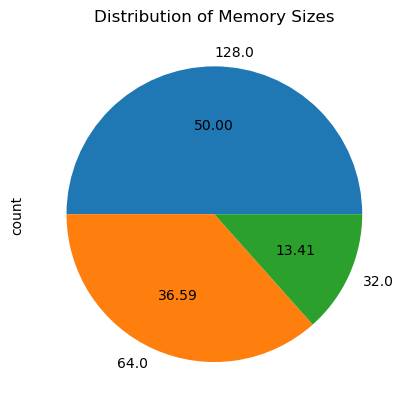

In [37]:
df['Memory'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Distribution of Memory Sizes')  
plt.show()

In [38]:
# 128GB Storage is the most common, accounting for 47.83% .
# 64GB Storage follows with 31.07%.
# 256GB Storage represents 10.36% of the data.
# 32GB Storage has a smaller presence (9.79%).
# 16GB Storage is the least common, with only 0.94%.

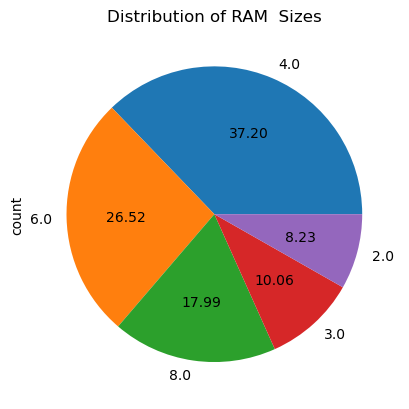

In [39]:
df['RAM'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Distribution of RAM  Sizes')  
plt.show()

In [40]:
# RAM Size 4GB has the highest percentage (33.90%).
# 8GB RAM is the second most common (29.19%).
# 6GB RAM accounts for 22.41% .
# 2GB (6.97%) and 3GB (7.53%) are the least common.

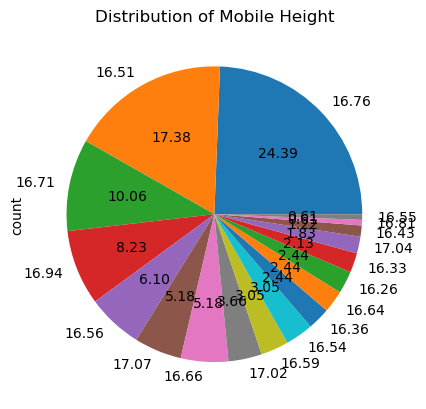

In [41]:
df['Mobile Height'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Distribution of Mobile Height')  
plt.show()

In [42]:
# The chart is divided into multiple segments, each representing a specific mobile height.
# The largest segment corresponds to the value 16.76, with a percentage of 24.39%.
# Other significant segments include 17.38, 16.51, 16.71, and 10.06%.
# The chart appears cluttered due to a high number of unique values, making the labels difficult to read.

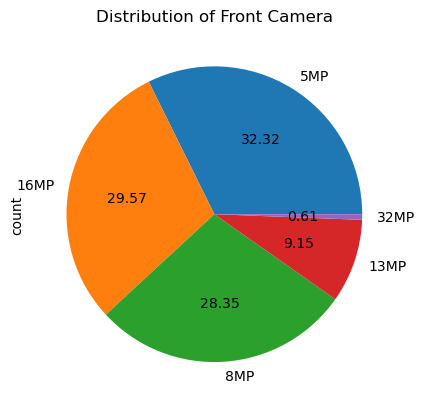

In [43]:
df['Front Camera'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Distribution of Front Camera')  
plt.show()

In [44]:
# The most common front camera resolution is 5MP, covering 32.32% of the distribution.
# The second and third most common resolutions are 16MP (29.57%) and 8MP (28.35%).
# 13MP cameras account for 9.15%, while 32MP cameras make up only 0.61% of the distribution.
# The chart effectively shows the popularity of different front camera resolutions.

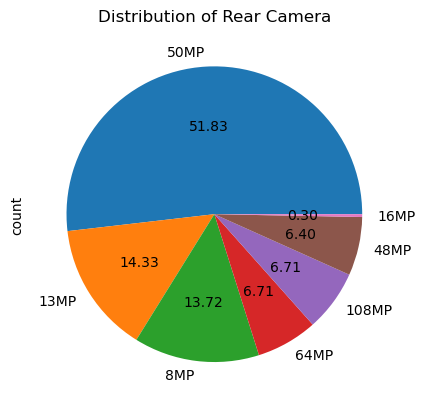

In [45]:
df['Rear Camera'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Distribution of Rear Camera')  
plt.show()

In [46]:
# The most common rear camera resolution is 50MP, accounting for 51.83% of the distribution.
# Other popular resolutions include:
# 13MP (14.33%)
# 8MP (13.72%)
# 64MP (6.71%)
# 48MP (6.40%)
# Higher-end resolutions like 108MP are the least common.
# 16MP cameras are the rarest, contributing just 0.30% to the distribution.

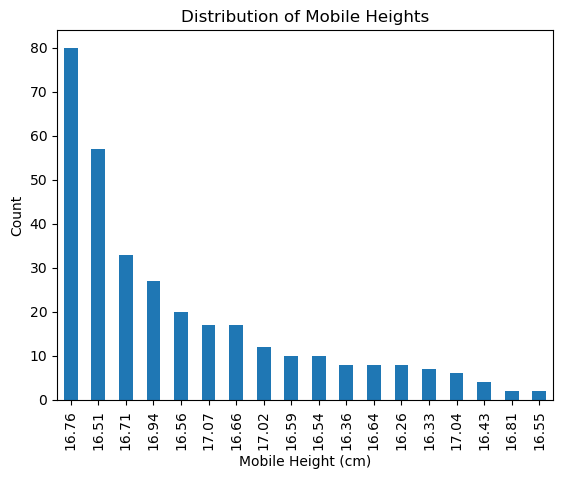

In [47]:
df['Mobile Height'].value_counts().plot(kind='bar')
plt.xlabel('Mobile Height (cm)')  
plt.ylabel('Count')              
plt.title('Distribution of Mobile Heights')  
plt.show()

In [48]:
# The most common mobile height is around 16.75 cm, with the highest count.
# The distribution is right-skewed, meaning there are fewer occurrences of larger mobile heights.
# The frequency decreases as height increases, indicating that smaller mobile heights are more common.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


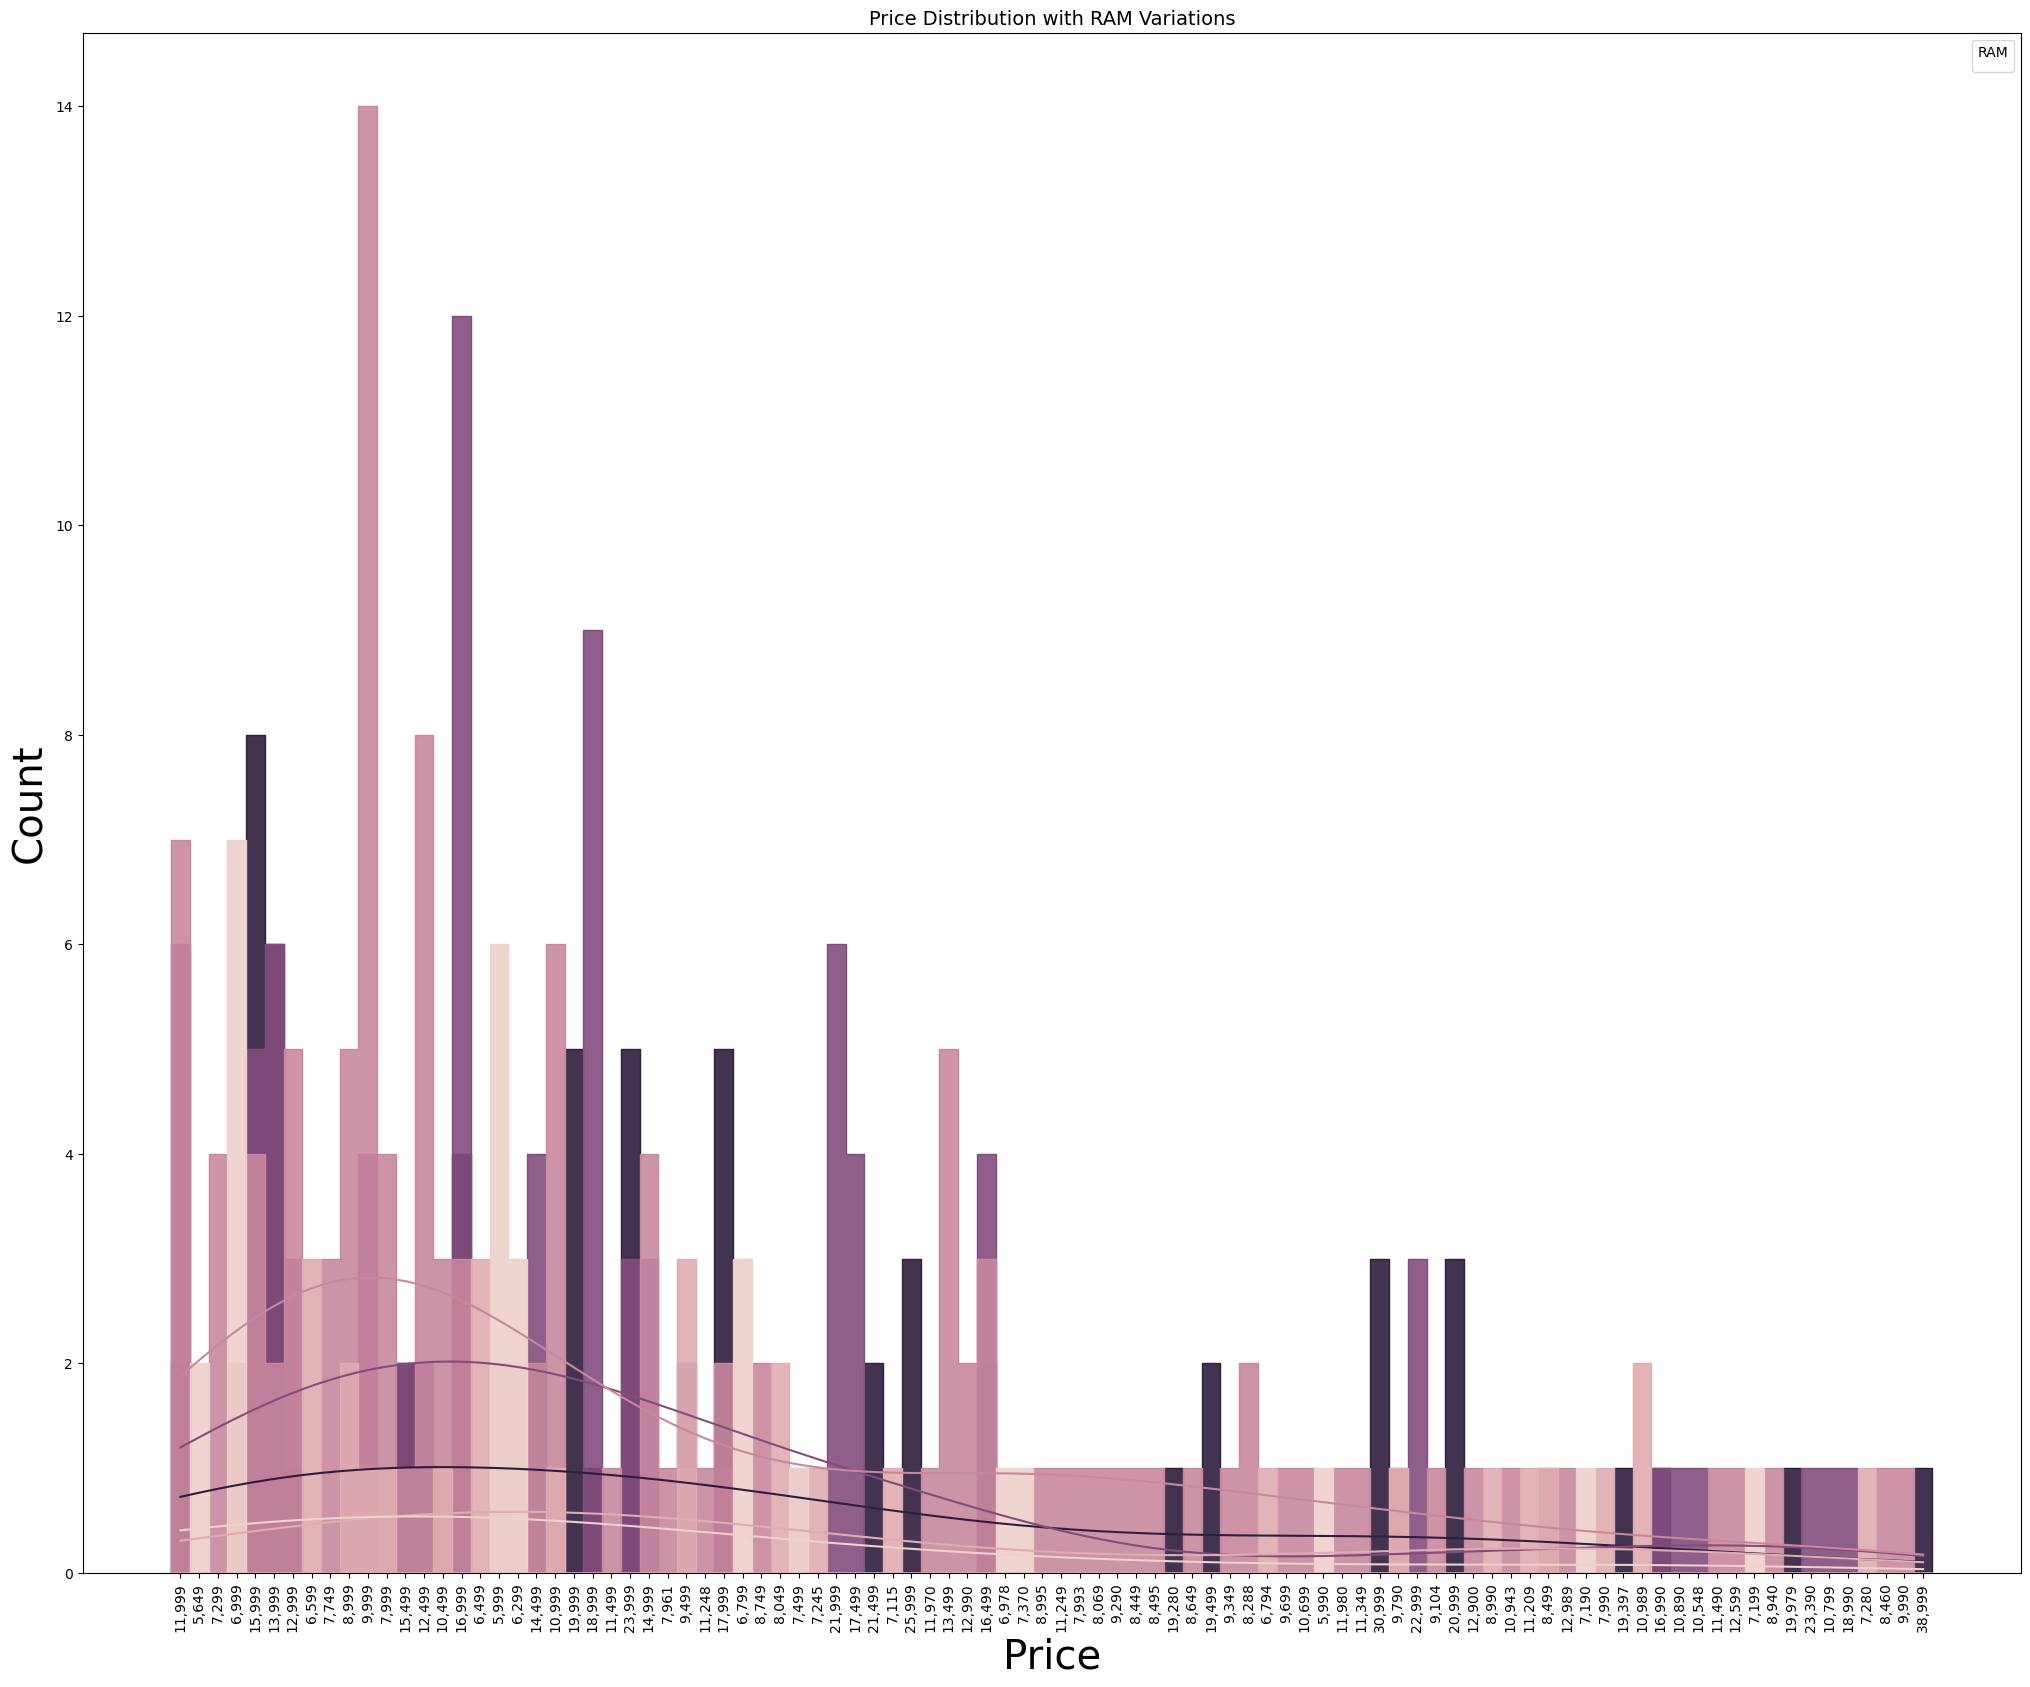

In [49]:
plt.figure(figsize=(25, 20))
sns.histplot(data=df, x='Prize', bins=30, hue='RAM', element='step', alpha=0.9, kde=True)
plt.xticks(rotation=90)
plt.title('Price Distribution with RAM Variations', fontsize=14)
plt.xlabel('Price', fontsize=29)
plt.ylabel('Count', fontsize=29)
plt.legend(title="RAM")
plt.show()


In [50]:
# X-axis (Price): Shows the range of prices, with specific values listed.
# Y-axis (Count): Indicates the number of items falling within each price range.
# Bars: Each bar represents the count of items at a particular price point.
# Color Coding: The colors likely differentiate the data by different RAM sizes. 
# This allows you to see how price distributions vary based on RAM.
# Curves: The lines running through the histogram are likely Kernel Density Estimation (KDE) curves. 
# These show the smoothed distribution of the data, helping to visualize trends.

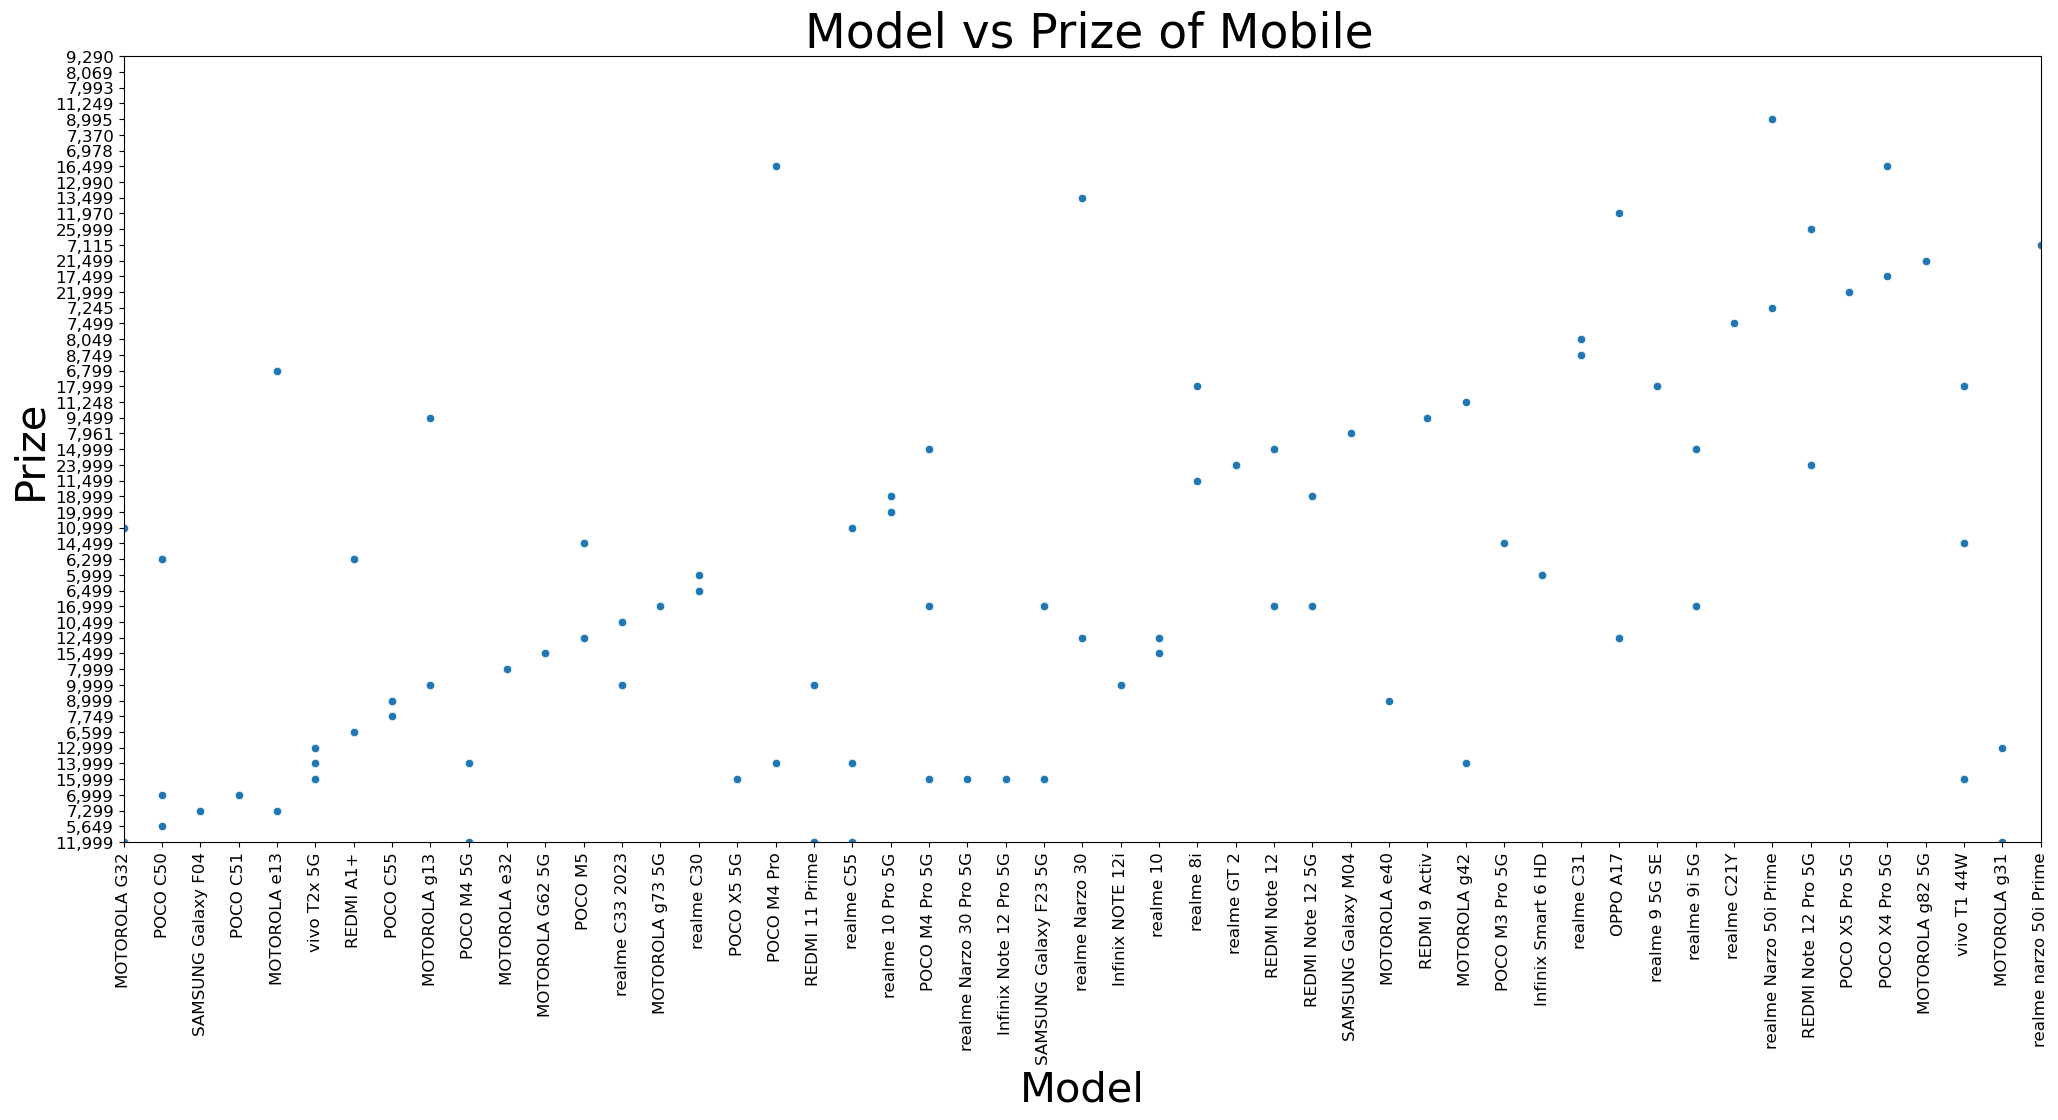

In [51]:
plt.figure(figsize=(40, 30))
plt.subplot(3, 2, 1)  
sns.scatterplot(x='Model', y='Prize', data=df)
plt.xlim(0, 50)  
plt.ylim(0, 50)  
plt.xticks(rotation=90, fontsize=12)  
plt.yticks(fontsize=12)  
plt.title(' Model vs Prize of Mobile', fontsize=34)
plt.xlabel('Model', fontsize=30)
plt.ylabel('Prize', fontsize=30)
plt.tight_layout()
plt.show()

In [52]:
# This scatter plot provides a clear and insightful visualization of the relationship between different mobile models and their respective prices.
# The distribution of points shows that higher-priced models tend to be more spread out, while lower-priced models are clustered together.
# This suggests that budget models have a consistent pricing range, whereas premium models vary significantly in price.
# Since "Model" is a categorical variable, the x-axis labels are rotated for better readability, allowing us to distinguish each mobile brand clearly.
# Some brands show a wide range of pricing, indicating multiple variants (basic, mid-range, and premium models).
#Certain data points are positioned significantly higher than others, indicating premium flagship models.

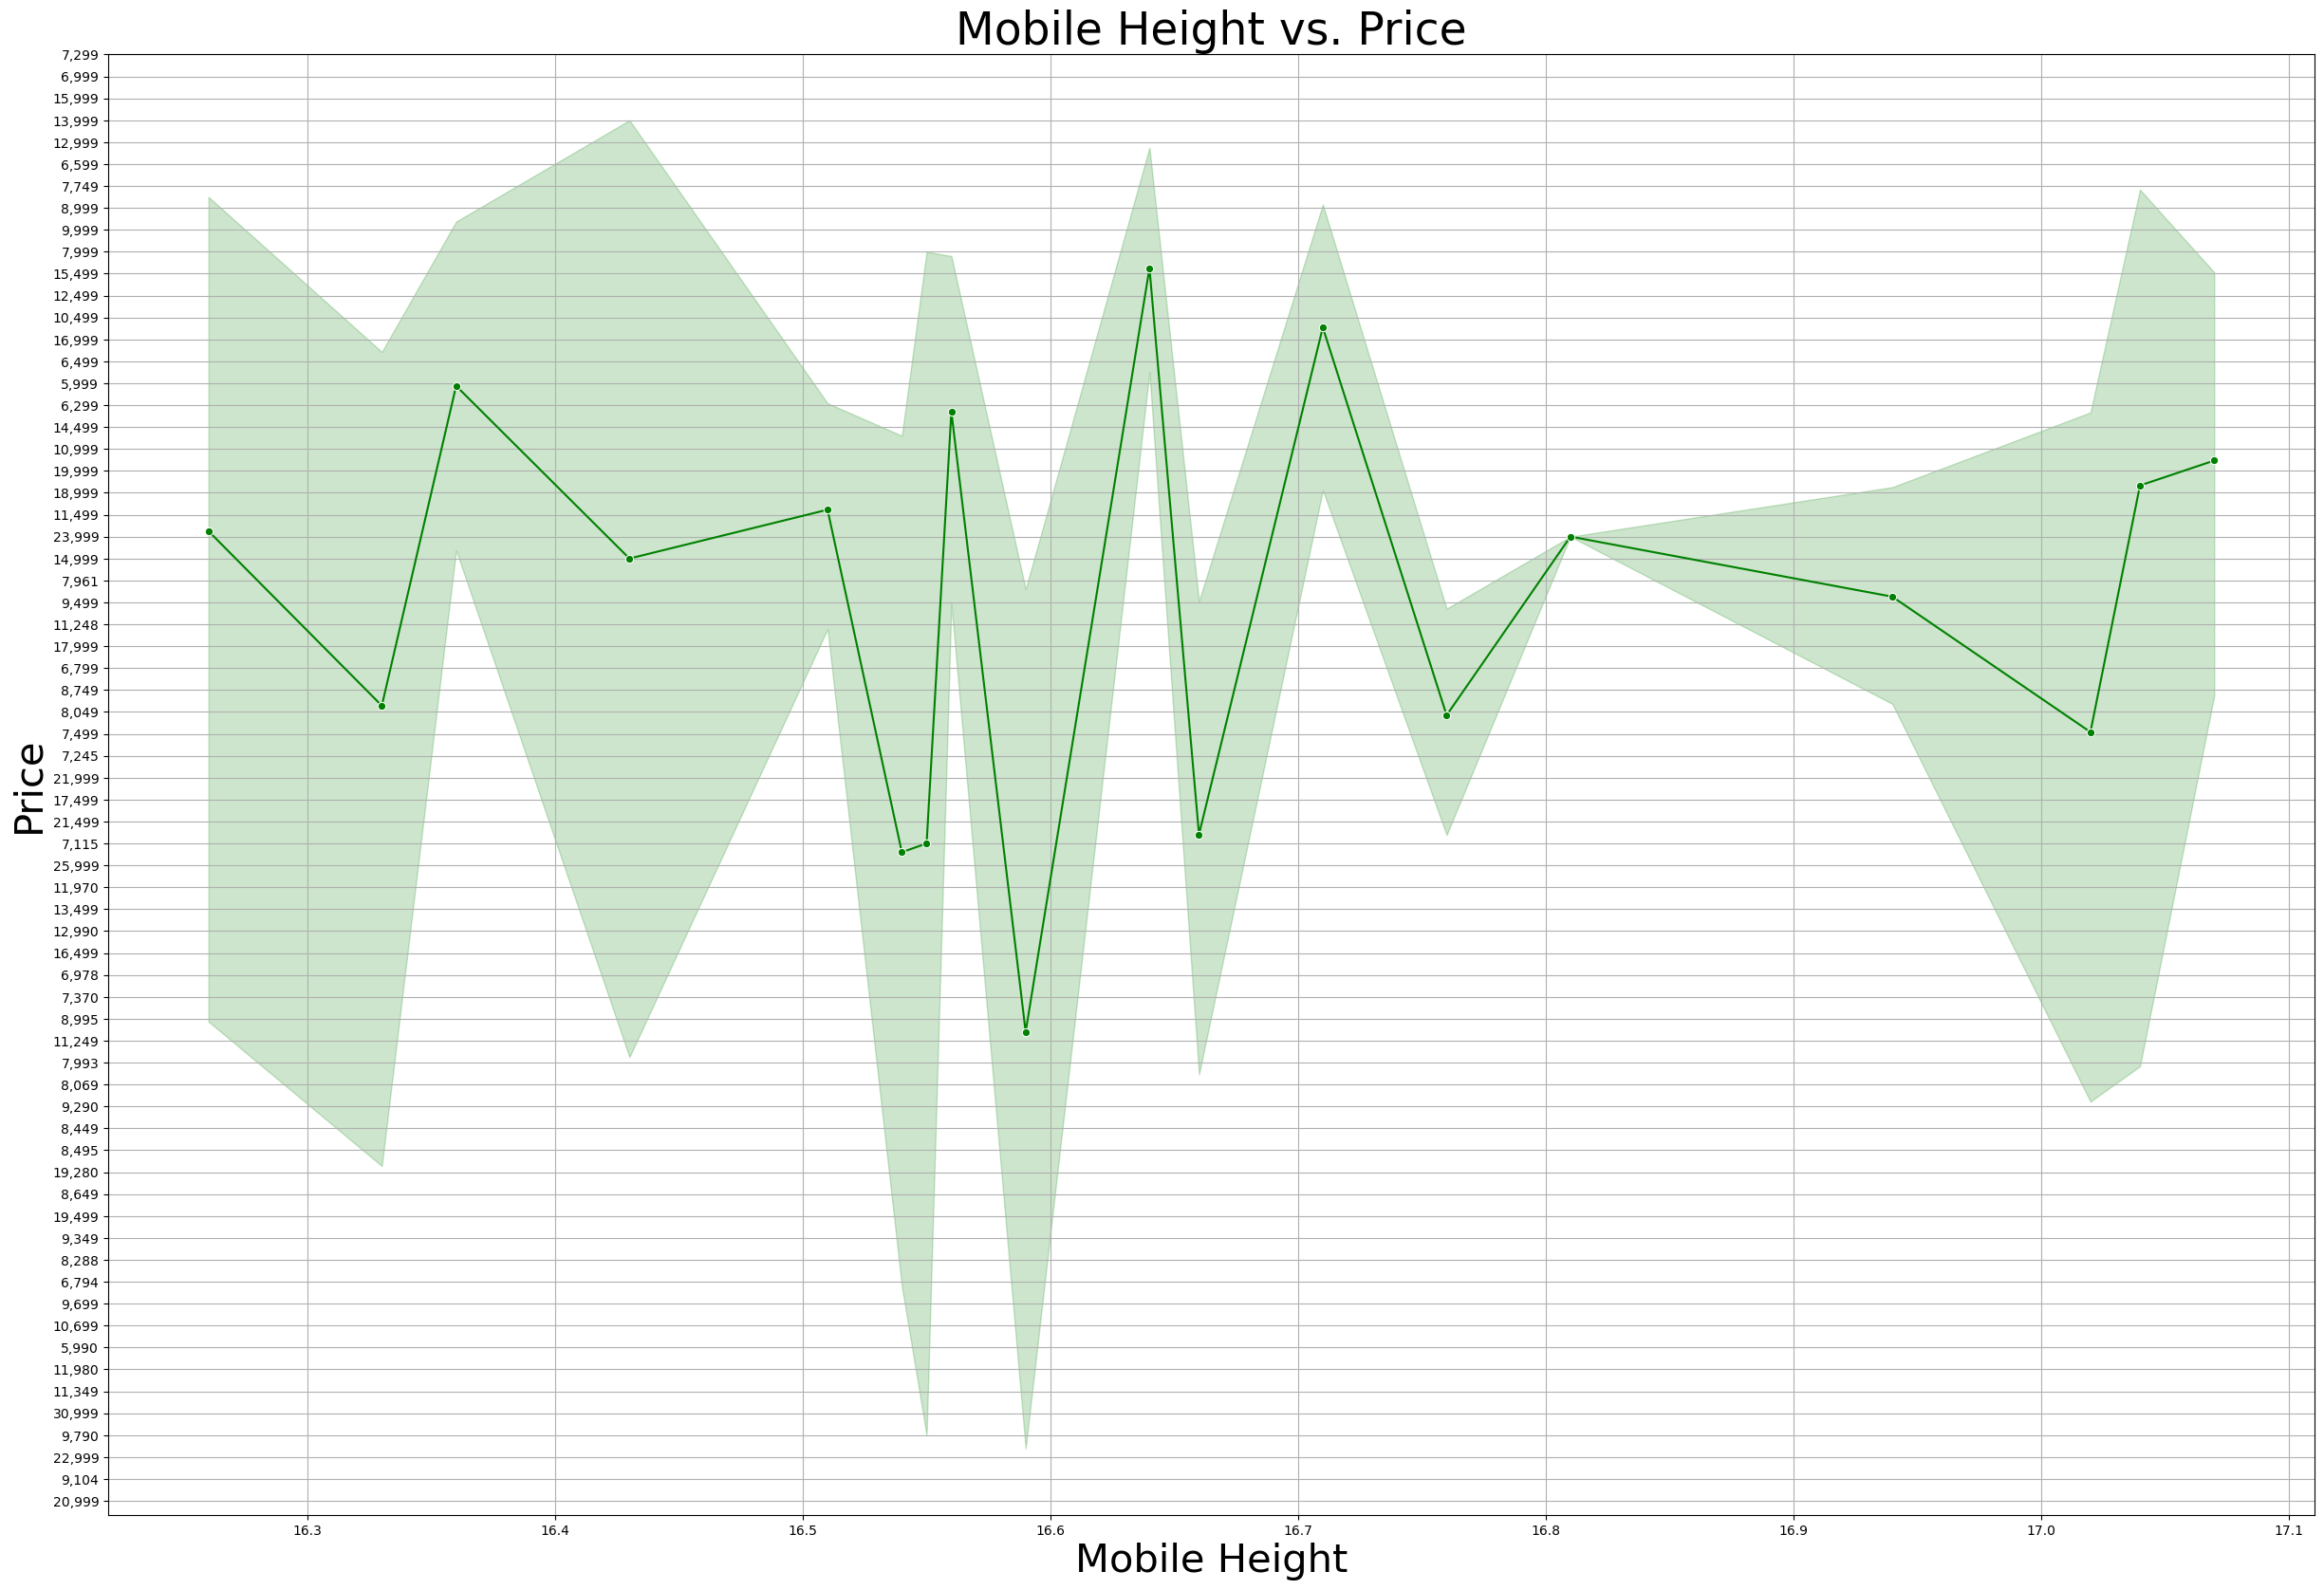

In [53]:
plt.figure(figsize=(30, 20))
sns.lineplot(x='Mobile Height', y='Prize', data=df, color='green', marker='o')
plt.xlabel('Mobile Height',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.title('Mobile Height vs. Price', fontsize=34)
plt.grid(True)
plt.show()

In [54]:
# The X-axis represents Mobile Height, likely measured in inches or centimeters.
# The Y-axis represents Price, indicating the cost of mobile devices.
# The green line represents the trend of price variation with mobile height.
# The shaded region represents the confidence interval or variability in pricing at each height.
# High Variability: The plot exhibits significant fluctuations, suggesting that mobile price does not follow a simple linear trend with height.
# Extreme Deviations: Certain height ranges (e.g., around 16.5 - 16.7) show drastic spikes and dips, indicating outliers or inconsistent pricing.
# Unreliable Pattern: The lack of a clear trend suggests that mobile height alone may not be a strong predictor of price.

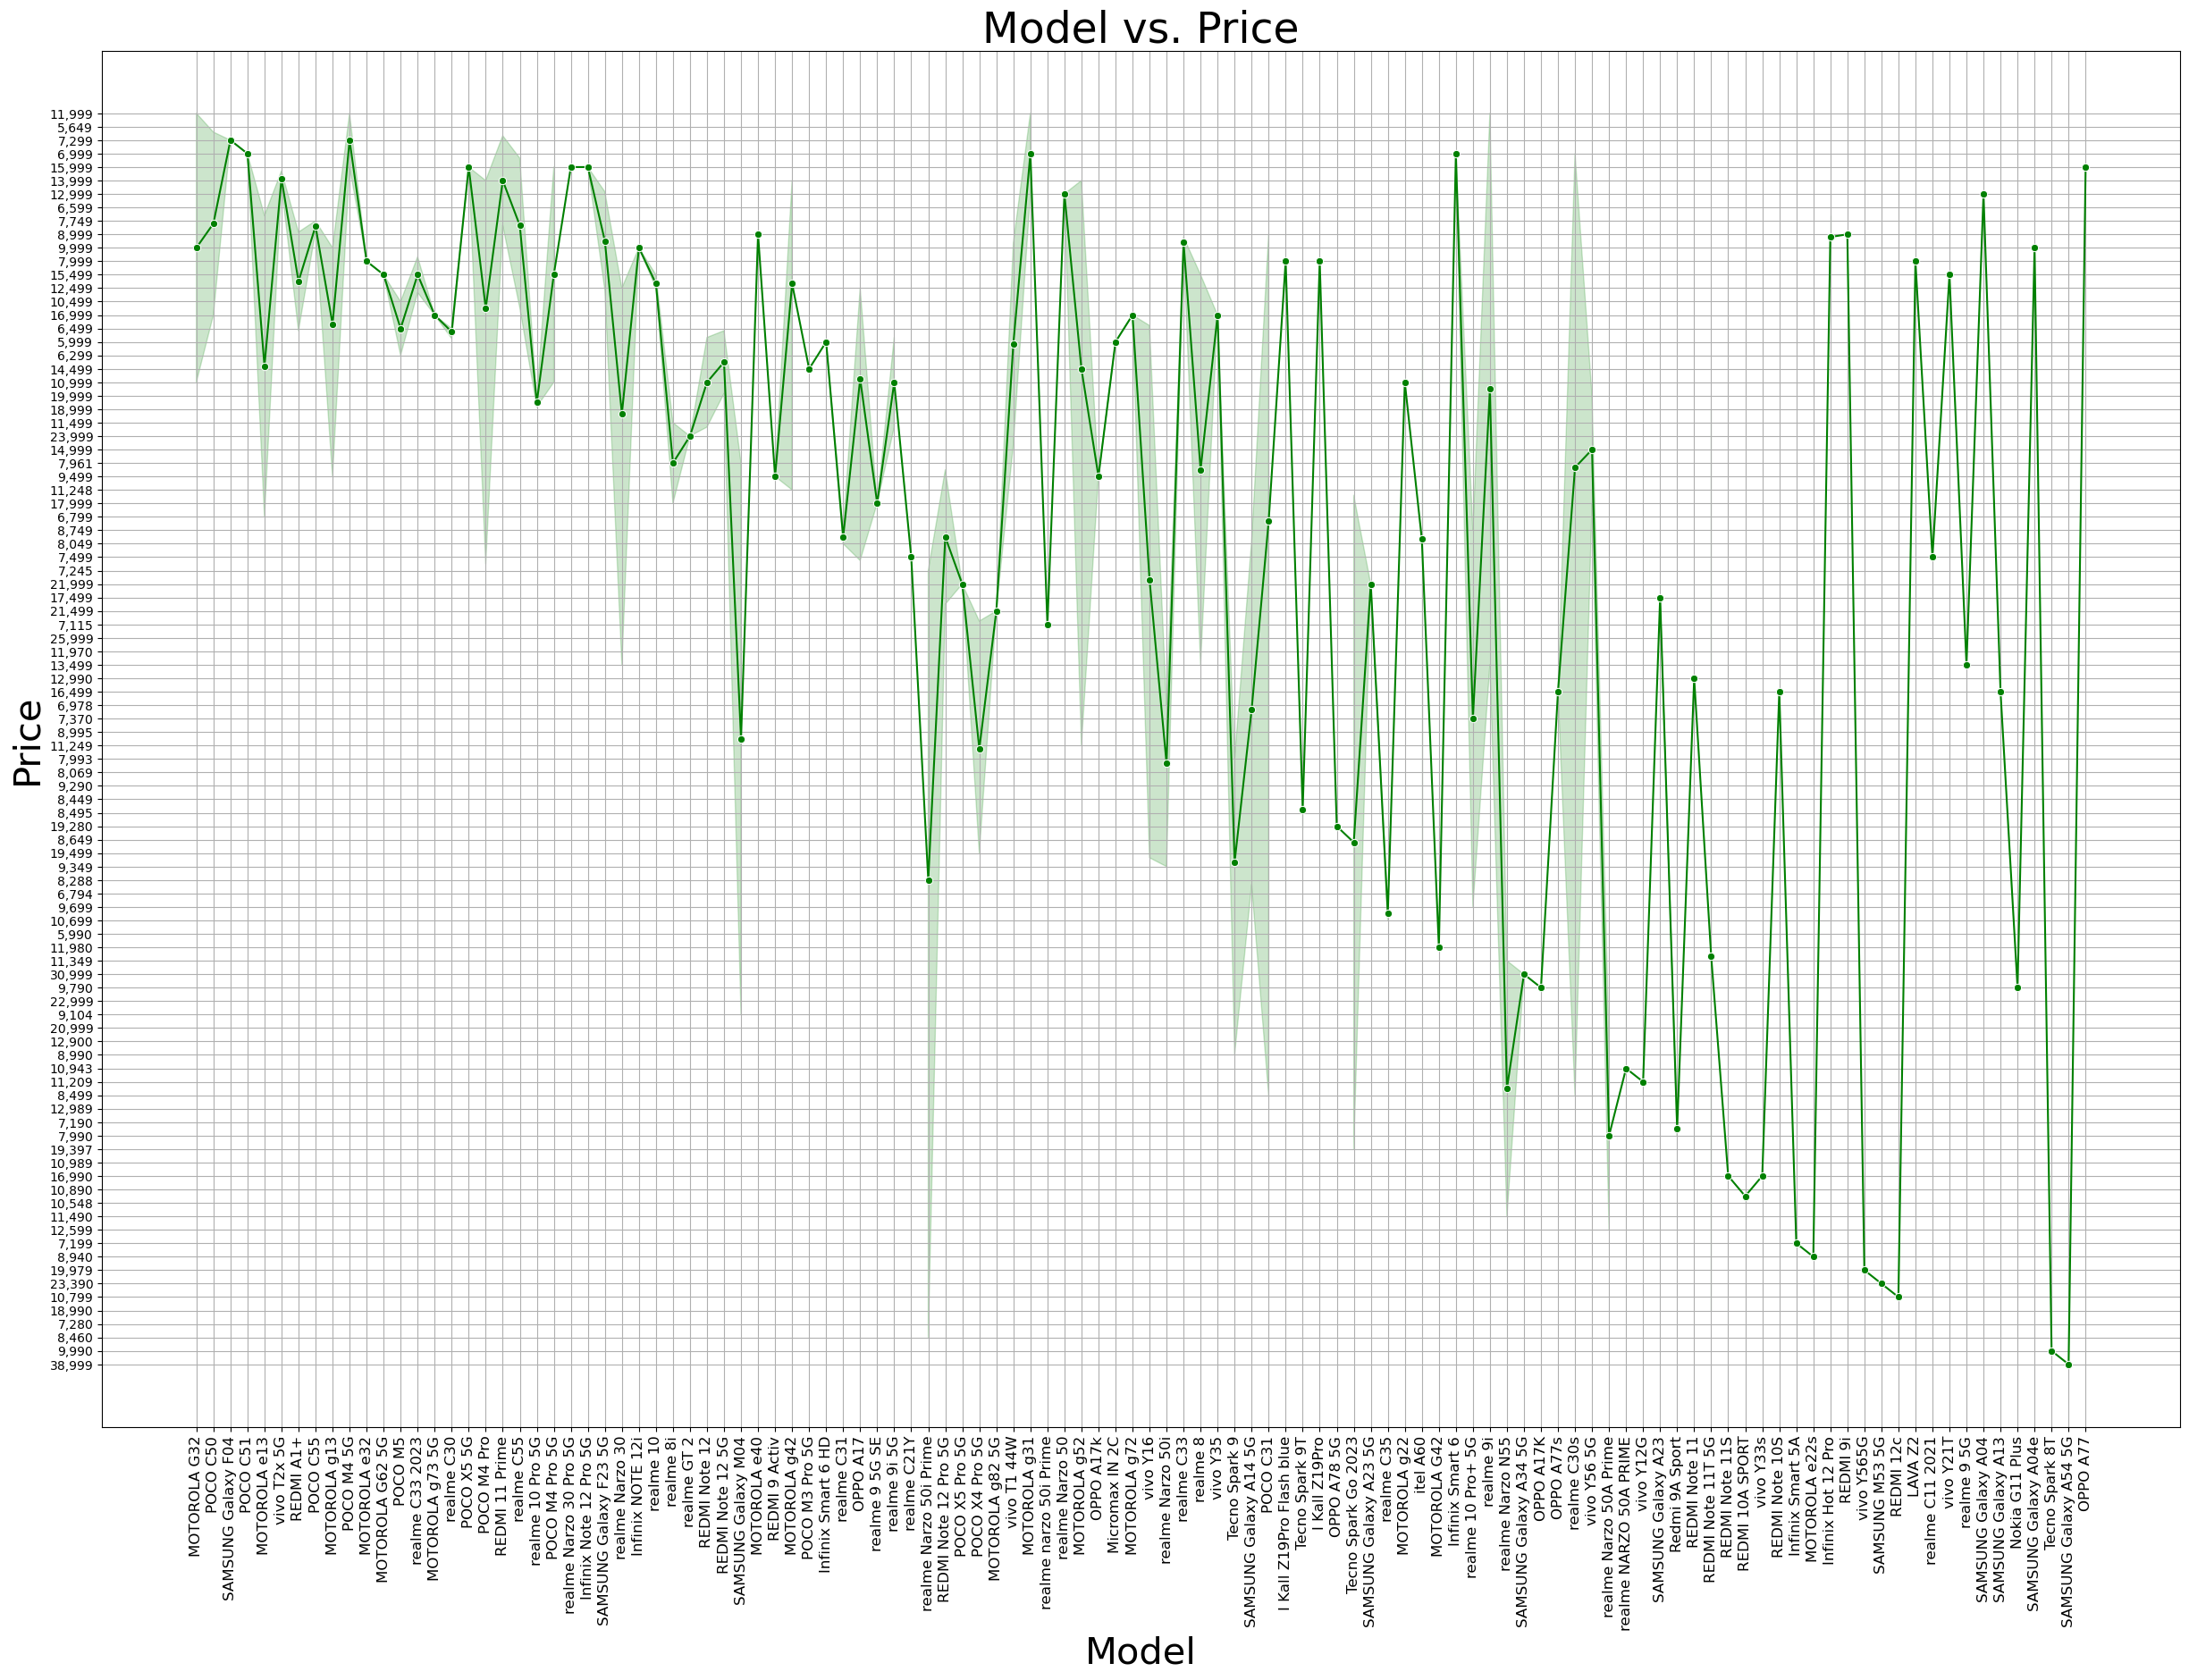

In [55]:
plt.figure(figsize=(30, 20))
sns.lineplot(x='Model', y='Prize', data=df, color='green', marker='o')
plt.xlabel('Model',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.xticks(rotation=90, fontsize=12)
plt.xlim()  
plt.ylim()
plt.title('Model vs. Price', fontsize=34)
plt.grid(True)
plt.show()

In [172]:
# X-axis: Represents different mobile models, with labels rotated for readability.
# Y-axis: Represents price, showing the cost distribution across models.
# Green line: Represents price trends for different models.
# Shaded region: Indicates the variability or confidence interval in pricing for each model.
# High Price Fluctuation: Prices vary significantly across different models, with no clear linear trend.
# Sudden Price Drops: Certain models have extreme low-price points, indicating budget devices or discounts.
# Clusters of Expensive Models: Some brands/models have consistently high pricing, likely premium or flagship devices.
# Dense and Unreadable Labels: The number of models makes it hard to interpret specific values without filtering.

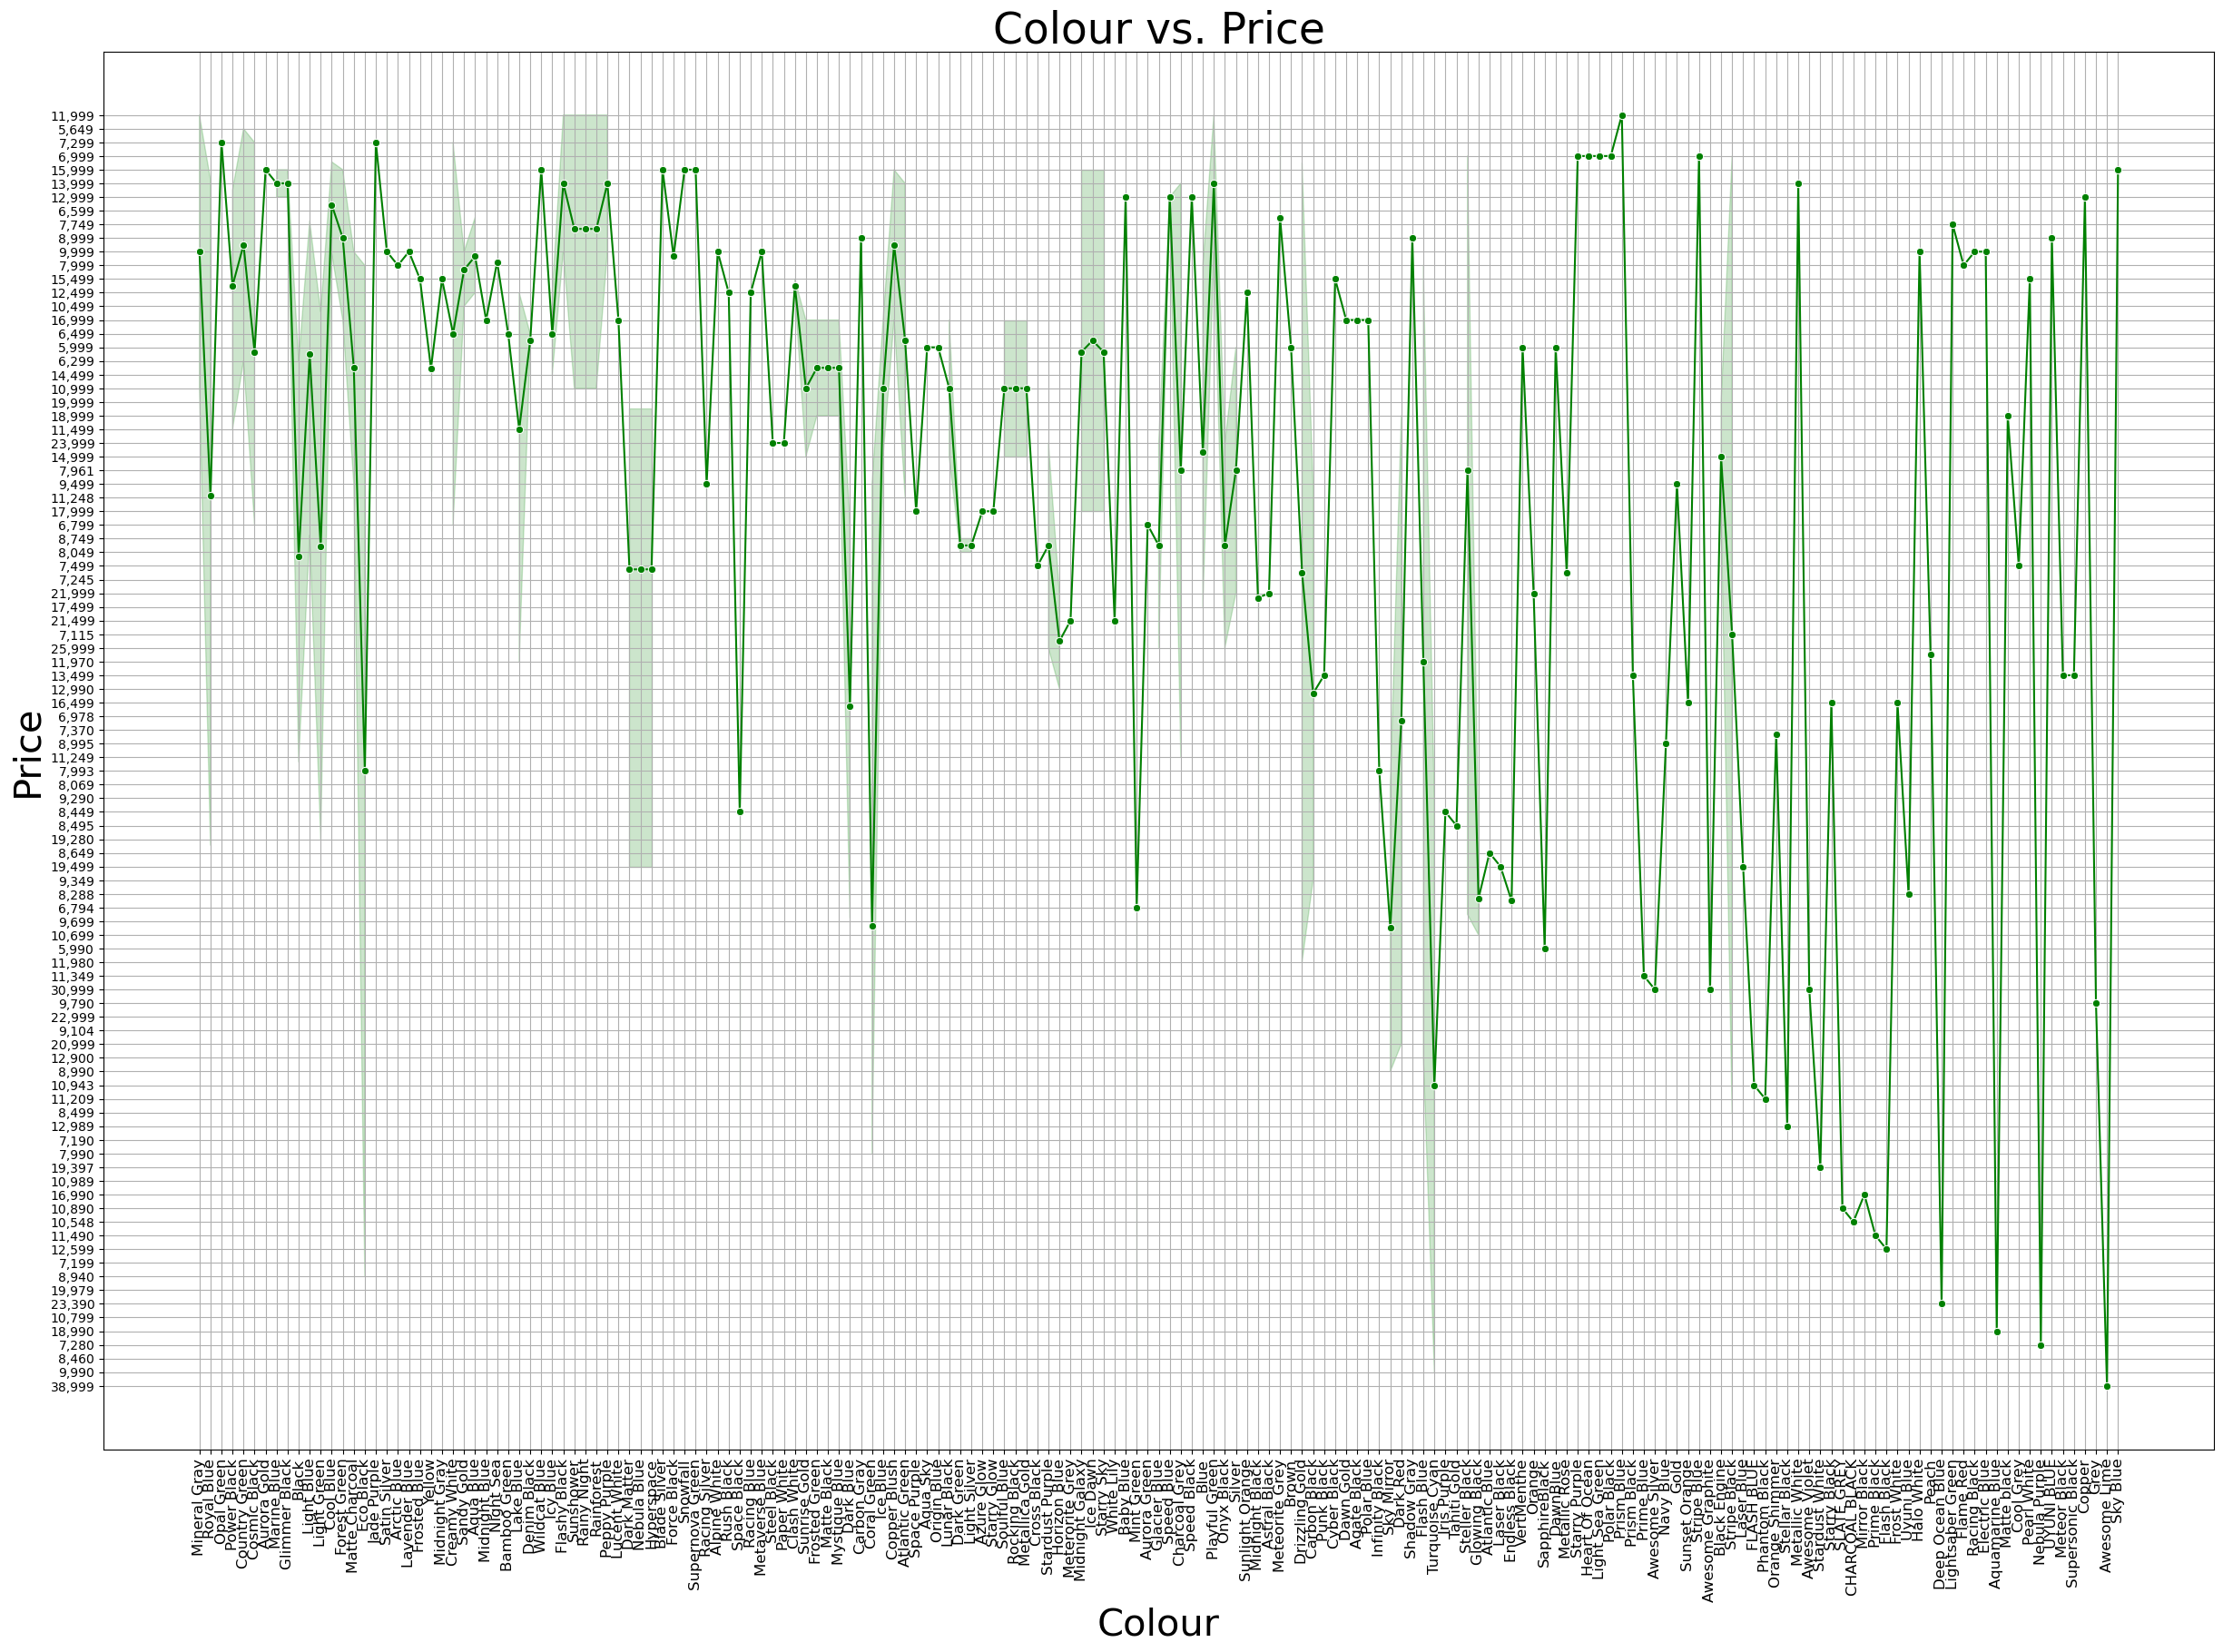

In [57]:
plt.figure(figsize=(30, 20))
sns.lineplot(x='Colour', y='Prize', data=df, color='green', marker='o')
plt.xlabel('Colour',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.xticks(rotation=90, fontsize=12)
plt.xlim()  
plt.ylim()
plt.title('Colour vs. Price', fontsize=34)
plt.grid(True)
plt.show()

In [58]:
# X-axis: Represents different mobile colors available in the dataset.
# Y-axis: Represents price, showing how the price varies with different colors.
# Green line: Represents price trends across different colors.
# Shaded region: Indicates variance or confidence intervals in pricing for each color.
# High Price Variability: Prices for the same color fluctuate significantly, suggesting that color alone does not determine price.
# Wide Range of Colors: A large number of color variations makes it difficult to spot a clear pattern.
# Extreme Price Drops: Some colors show significant dips, indicating the presence of budget models in those color categories.
# Limited Influence of Color: Since the price variation is not consistent for specific colors, 
# it suggests that color itself is not a strong determinant of price.
# Market Demand Impact: Popular colors (e.g., black, white) may be available across all price segments, contributing to broad price variability.


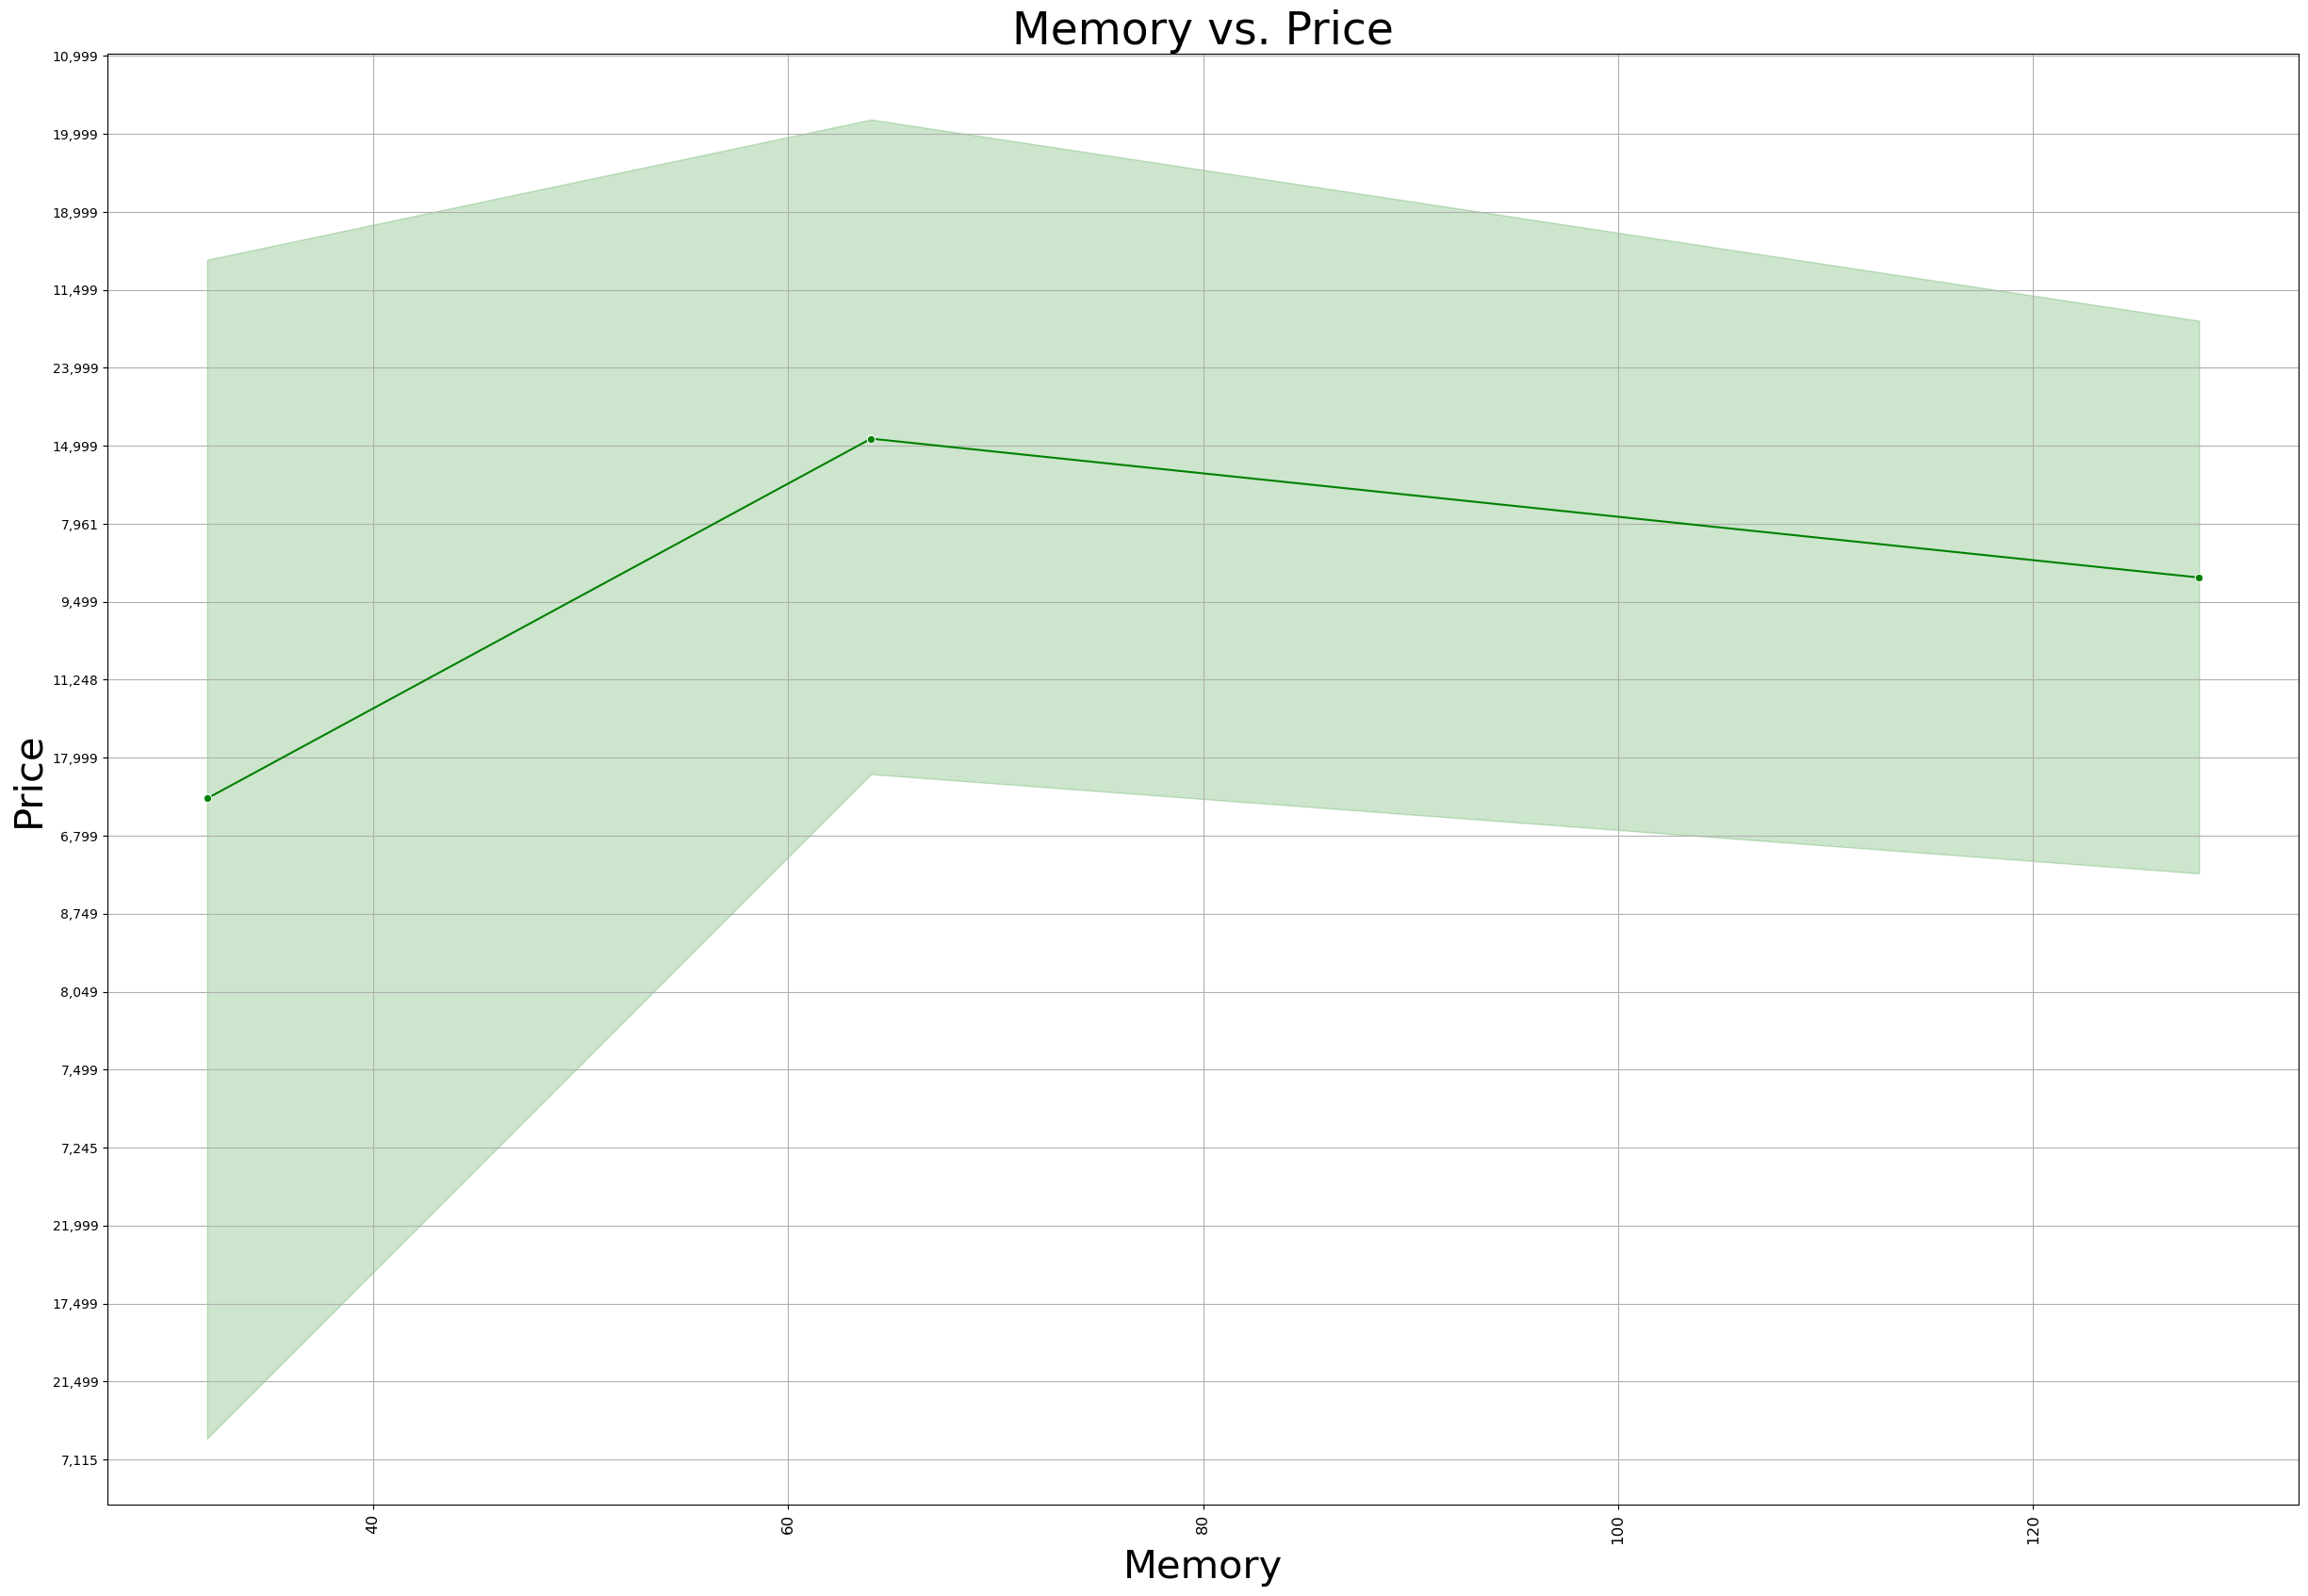

In [59]:
plt.figure(figsize=(30, 20))
sns.lineplot(x='Memory', y='Prize', data=df, color='green', marker='o')
plt.xlabel('Memory',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.xticks(rotation=90, fontsize=12)
plt.xlim()  
plt.ylim()
plt.title('Memory vs. Price', fontsize=34)
plt.grid(True)
plt.show()

In [60]:
# X-axis (Memory): Represents different memory (RAM) capacities.
# Y-axis (Price): Represents the price of devices corresponding to each memory level.
# Green Line: Represents the average price trend across different memory sizes.
# Shaded Area: Indicates the variance or confidence interval, showing the spread of prices for each memory size.
# Positive Trend Initially: The price increases as memory increases up to a certain point.
# Unexpected Decline: After reaching 8GB of RAM, the price seems to decrease slightly.
# Potential Anomaly: The decline in price after 8GB is unusual, as typically, higher RAM correlates with higher pricing.

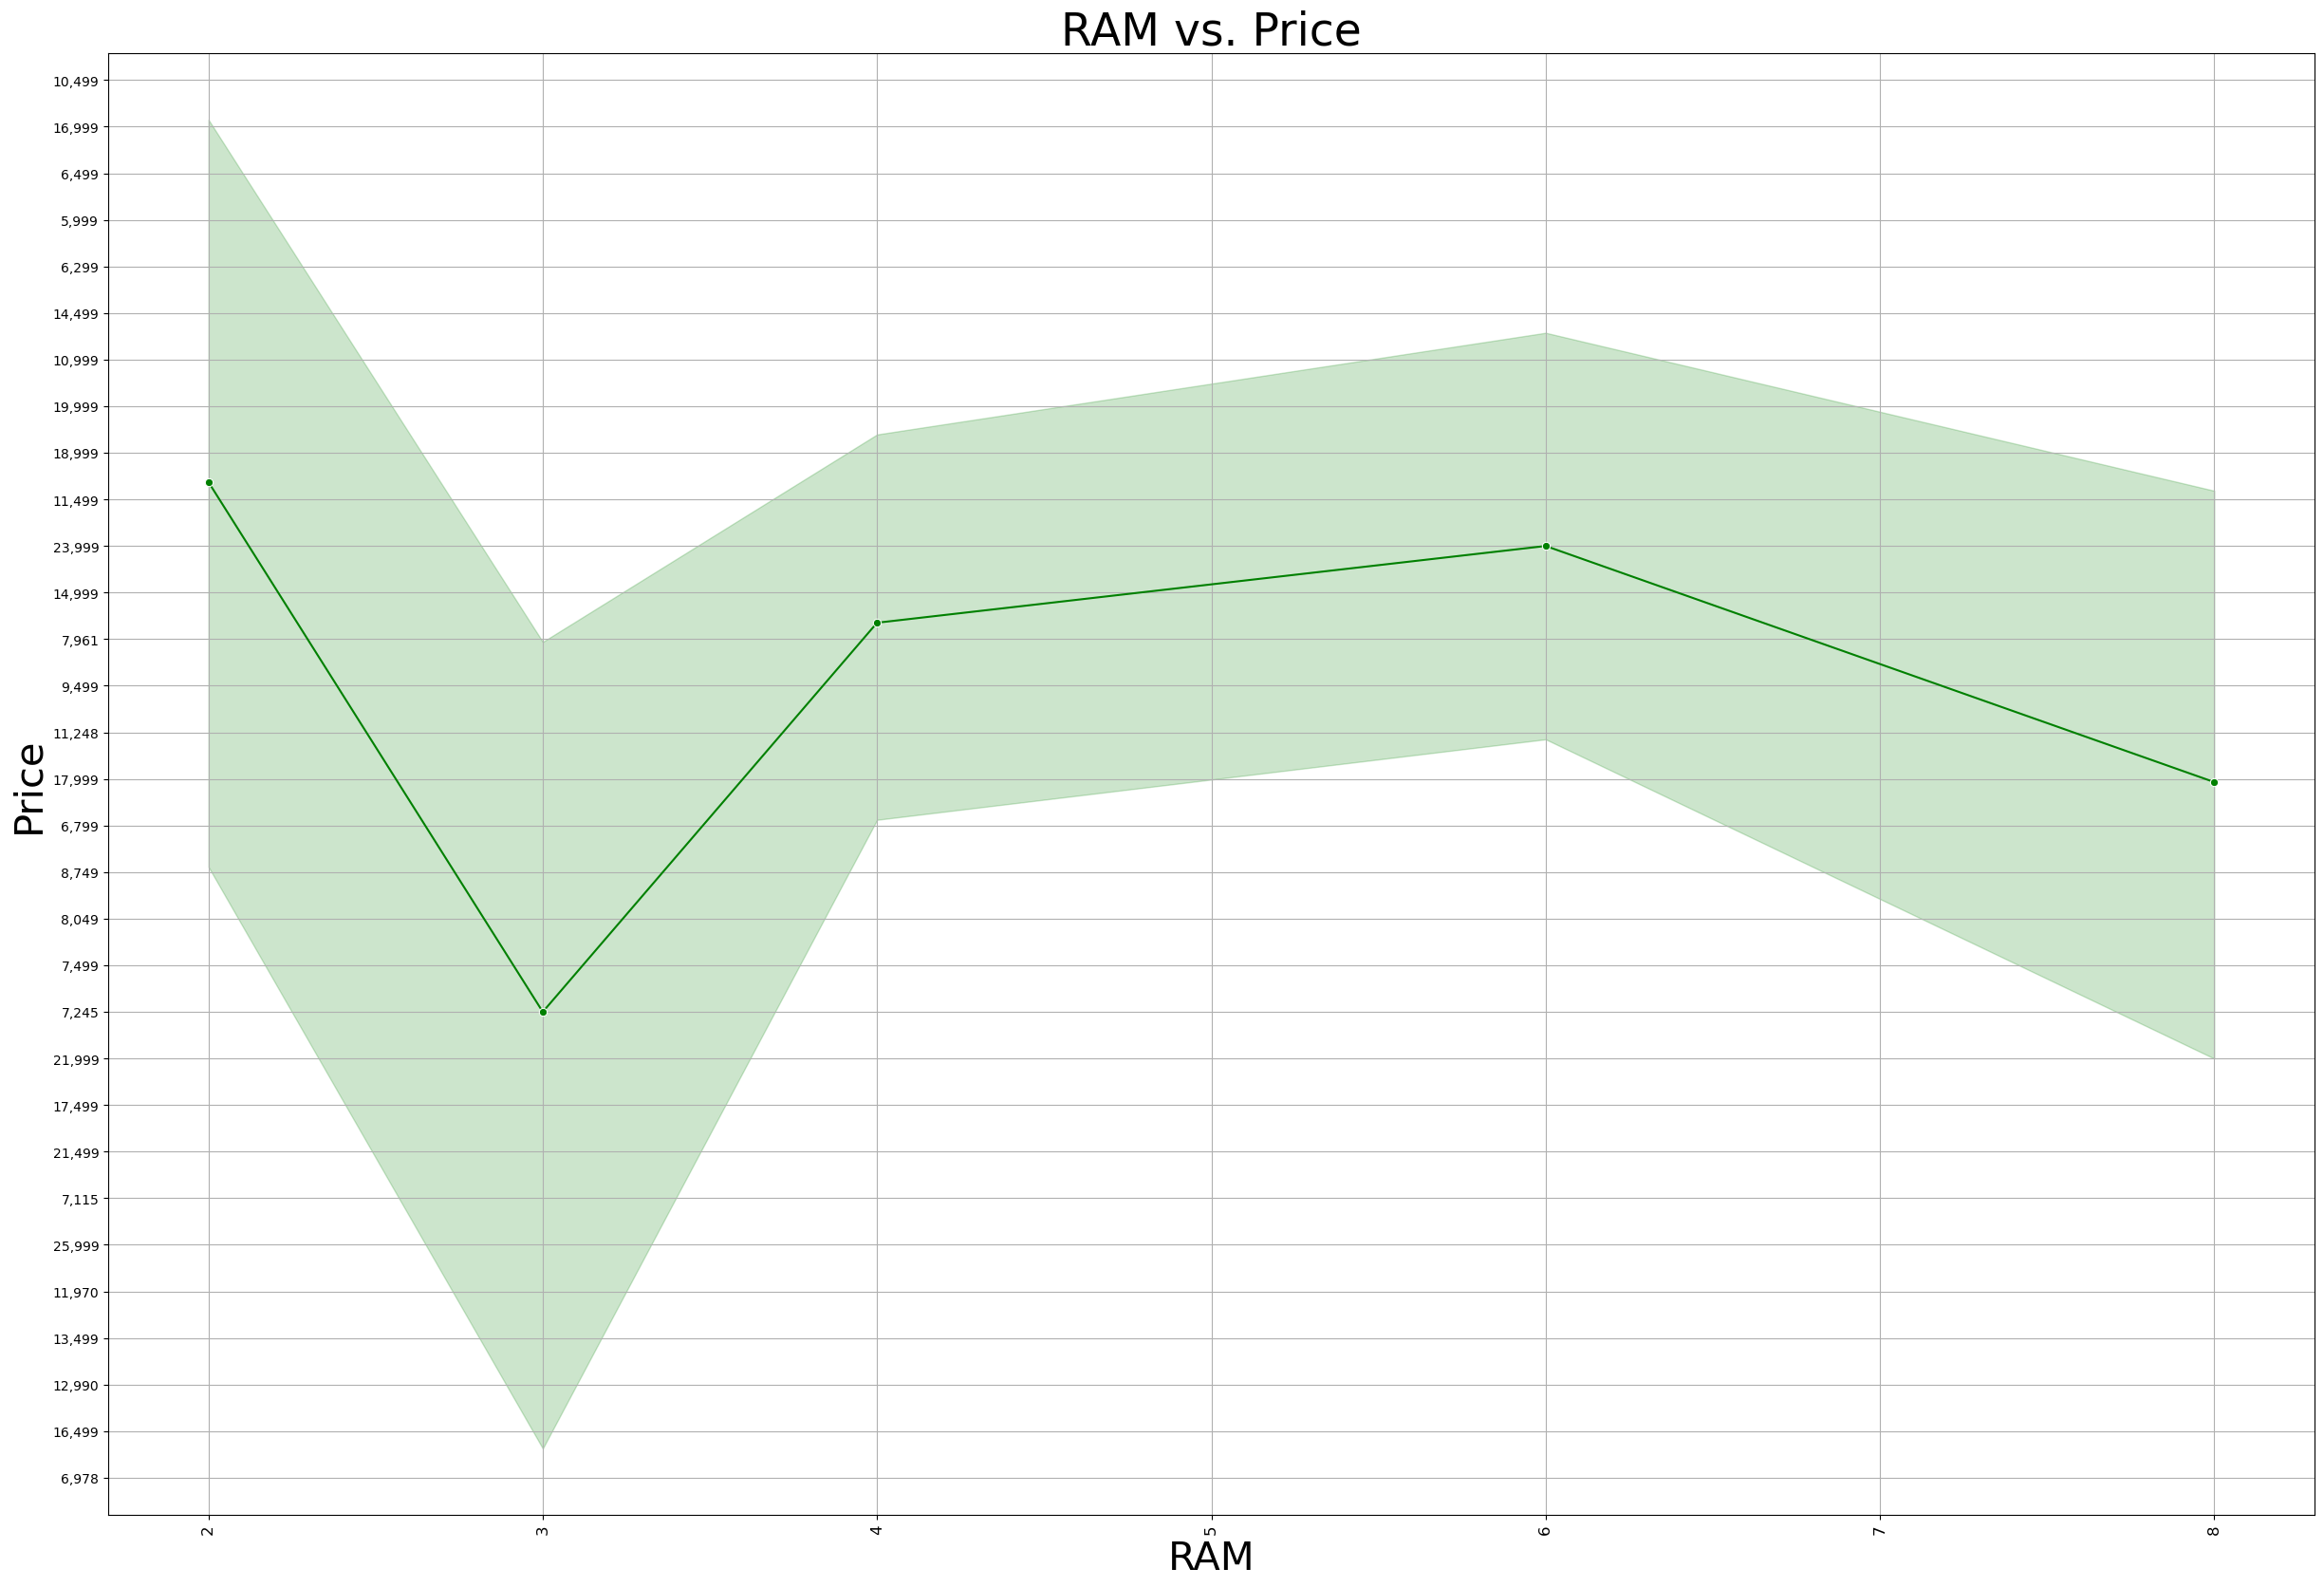

In [61]:
plt.figure(figsize=(30, 20))
sns.lineplot(x='RAM', y='Prize', data=df, color='green', marker='o')
plt.xlabel('RAM',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.xticks(rotation=90, fontsize=12)
plt.xlim()  
plt.ylim()
plt.title('RAM vs. Price', fontsize=34)
plt.grid(True)
plt.show()

In [62]:
# X-axis (RAM): Represents different RAM sizes in GB.
# Y-axis (Price): Represents the price of devices corresponding to each RAM size.
# Green Line: Indicates the trend of price as RAM increases.
# Shaded Region: Shows the variance or confidence interval, representing the spread of prices for each RAM size.
# Price Drop at 3GB: There is a sharp decline in price from 2GB to 3GB RAM, which is unexpected.
# Increase After 3GB: Prices rise again from 3GB to 6GB RAM, following a more expected trend.
# High Variability (Shaded Region): The price range is quite broad for most RAM sizes, suggesting that factors like brand, processor,
# storage, and display also play a role in determining price.
# Data Imbalance: If there are fewer high-end 8GB RAM devices, the average price may be skewed lower.
# Other Specs Influence Price: RAM alone is not the only determinant; 
# high-end phones with less RAM but better processors, cameras, and storage can cost more.

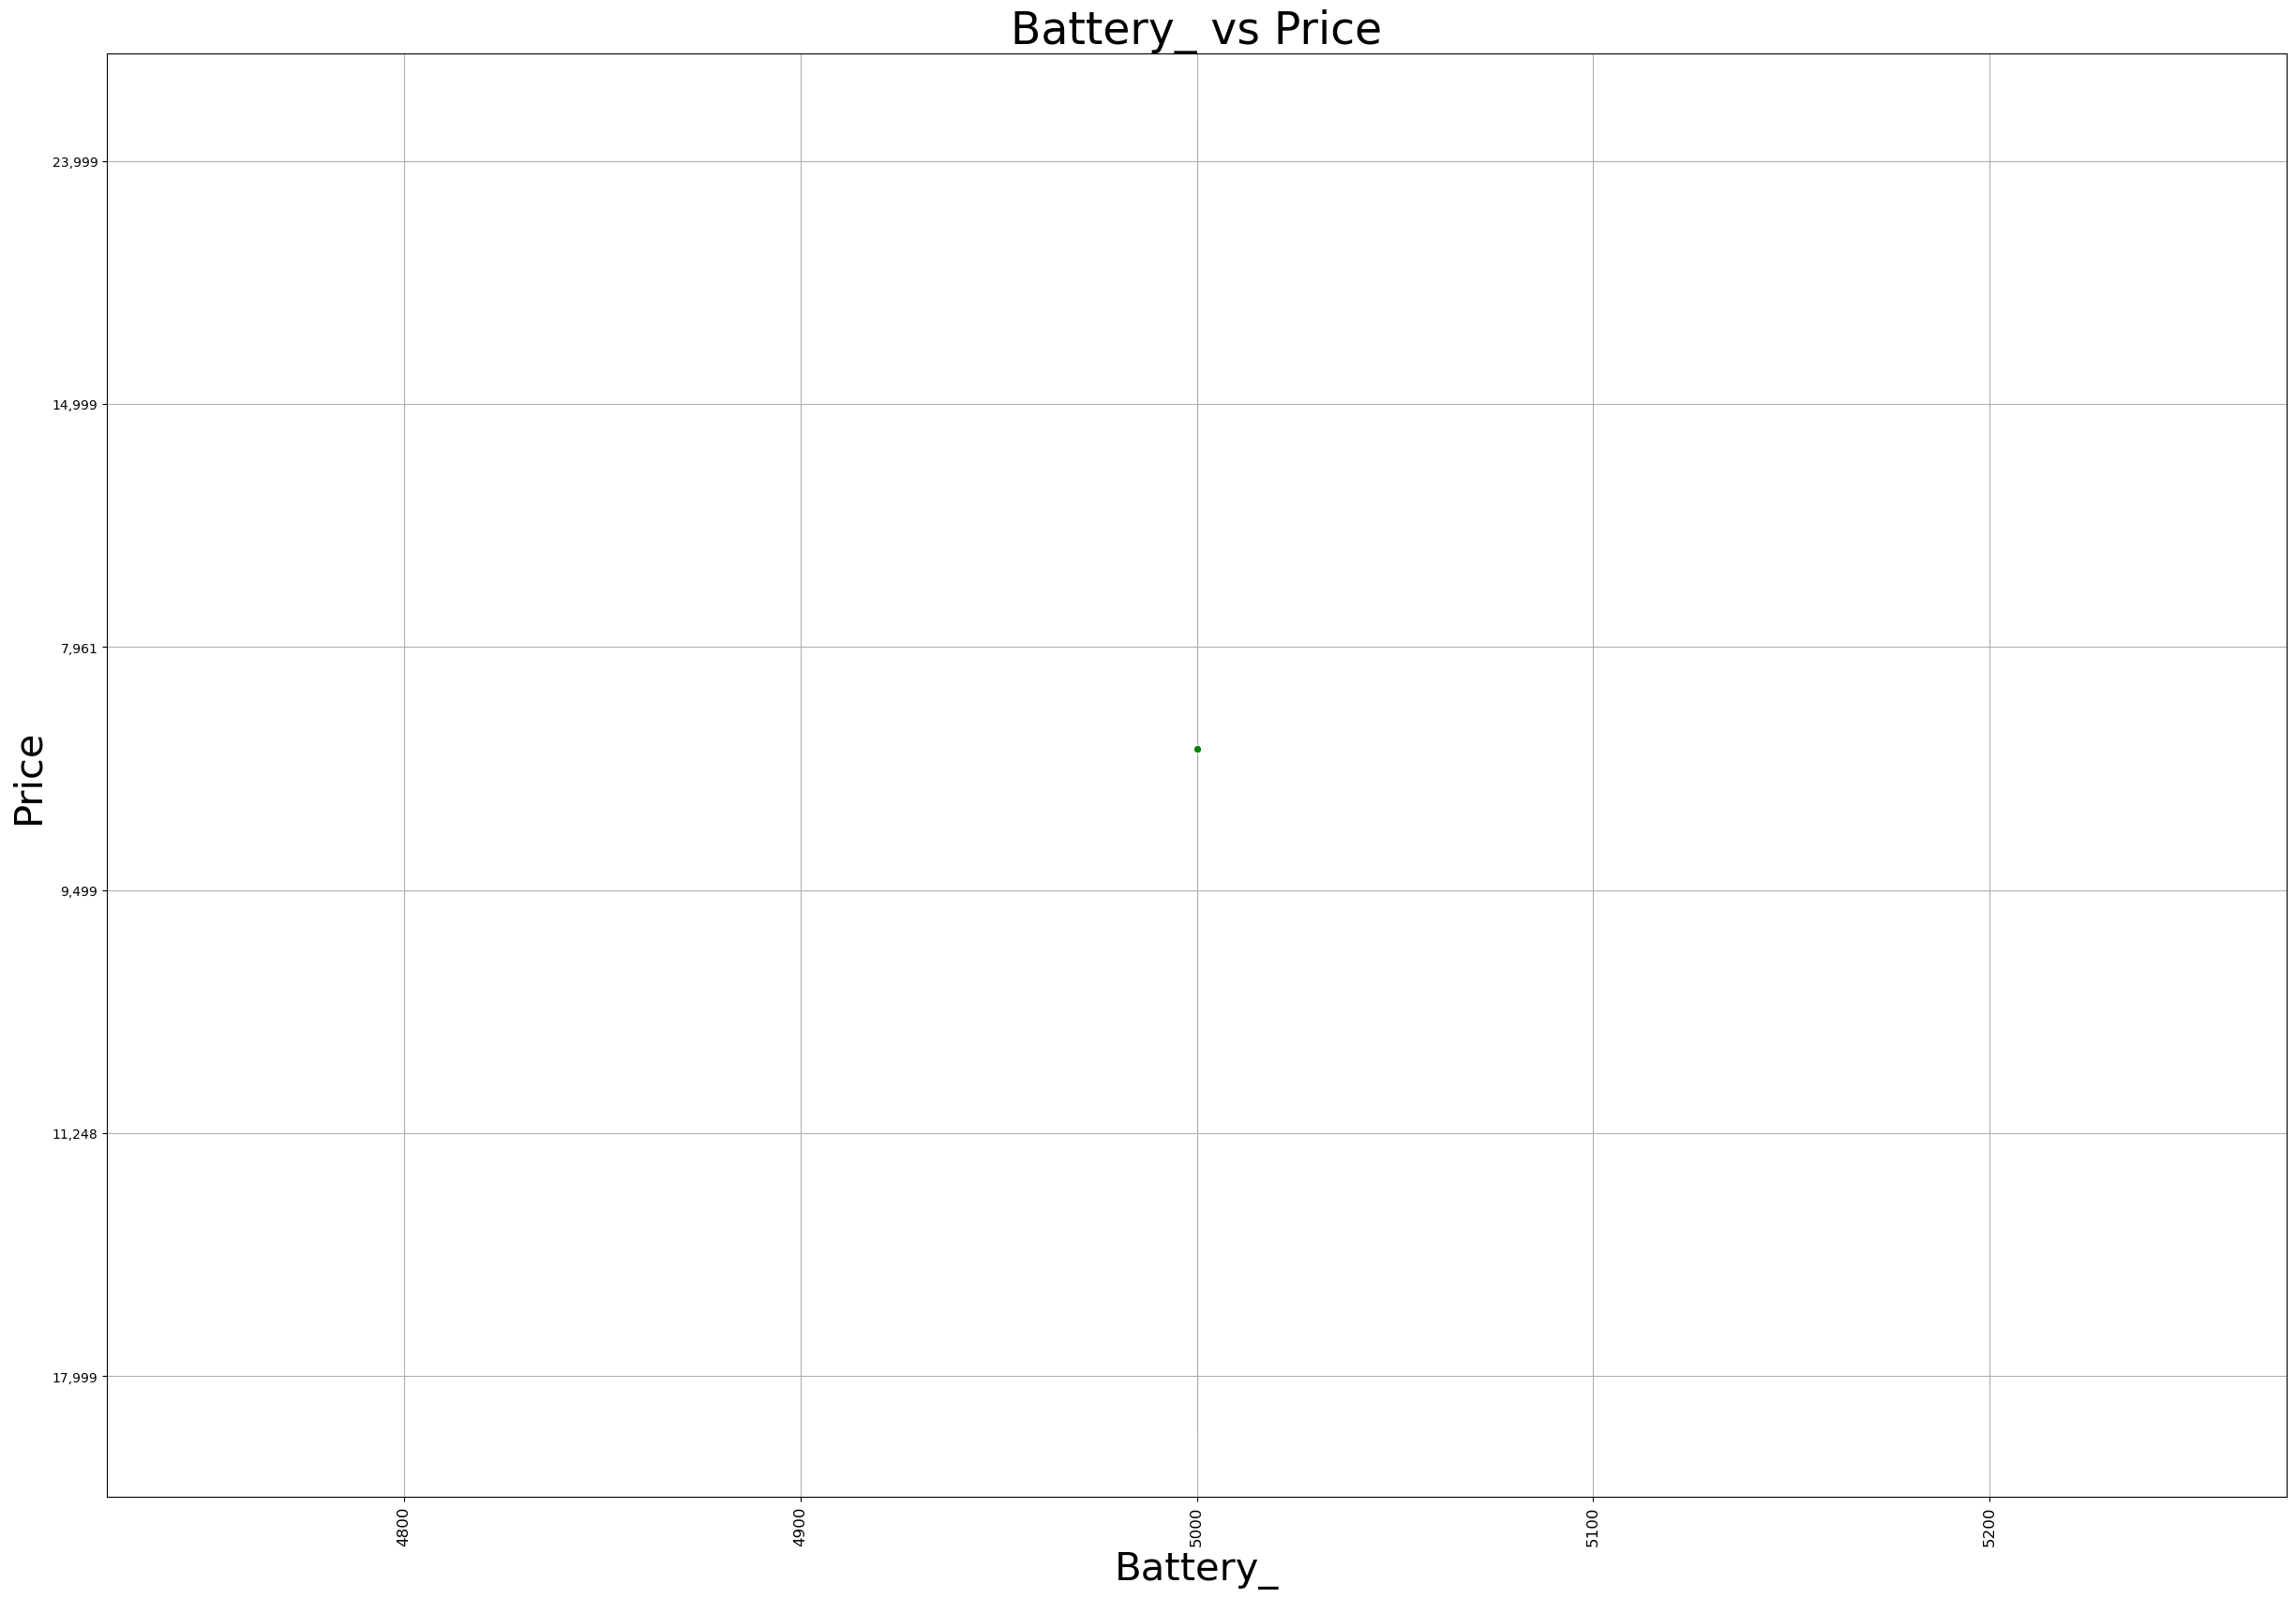

In [63]:
plt.figure(figsize=(30, 20))
sns.lineplot(x='Battery_', y='Prize', data=df, color='green', marker='o')
plt.xlabel('Battery_',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.xticks(rotation=90, fontsize=12)
plt.xlim()  
plt.ylim()
plt.title('Battery_ vs Price', fontsize=34)
plt.grid(True)
plt.show()

In [64]:
# X-axis (Battery Capacity in mAh): Represents different battery capacities.
# Y-axis (Price in Currency Units): Represents the price of devices corresponding to each battery size.
# Green Dot(s): Represents data points showing the relationship between battery size and price.
# Data Quality Issue: The dataset might have null values or incorrect labels in the "Battery" column.
# Filtering Problem: If the dataset was filtered incorrectly, some data points may have been excluded.
# Graph Scaling: The scale on both axes suggests that more data points should exist but are not appearing.

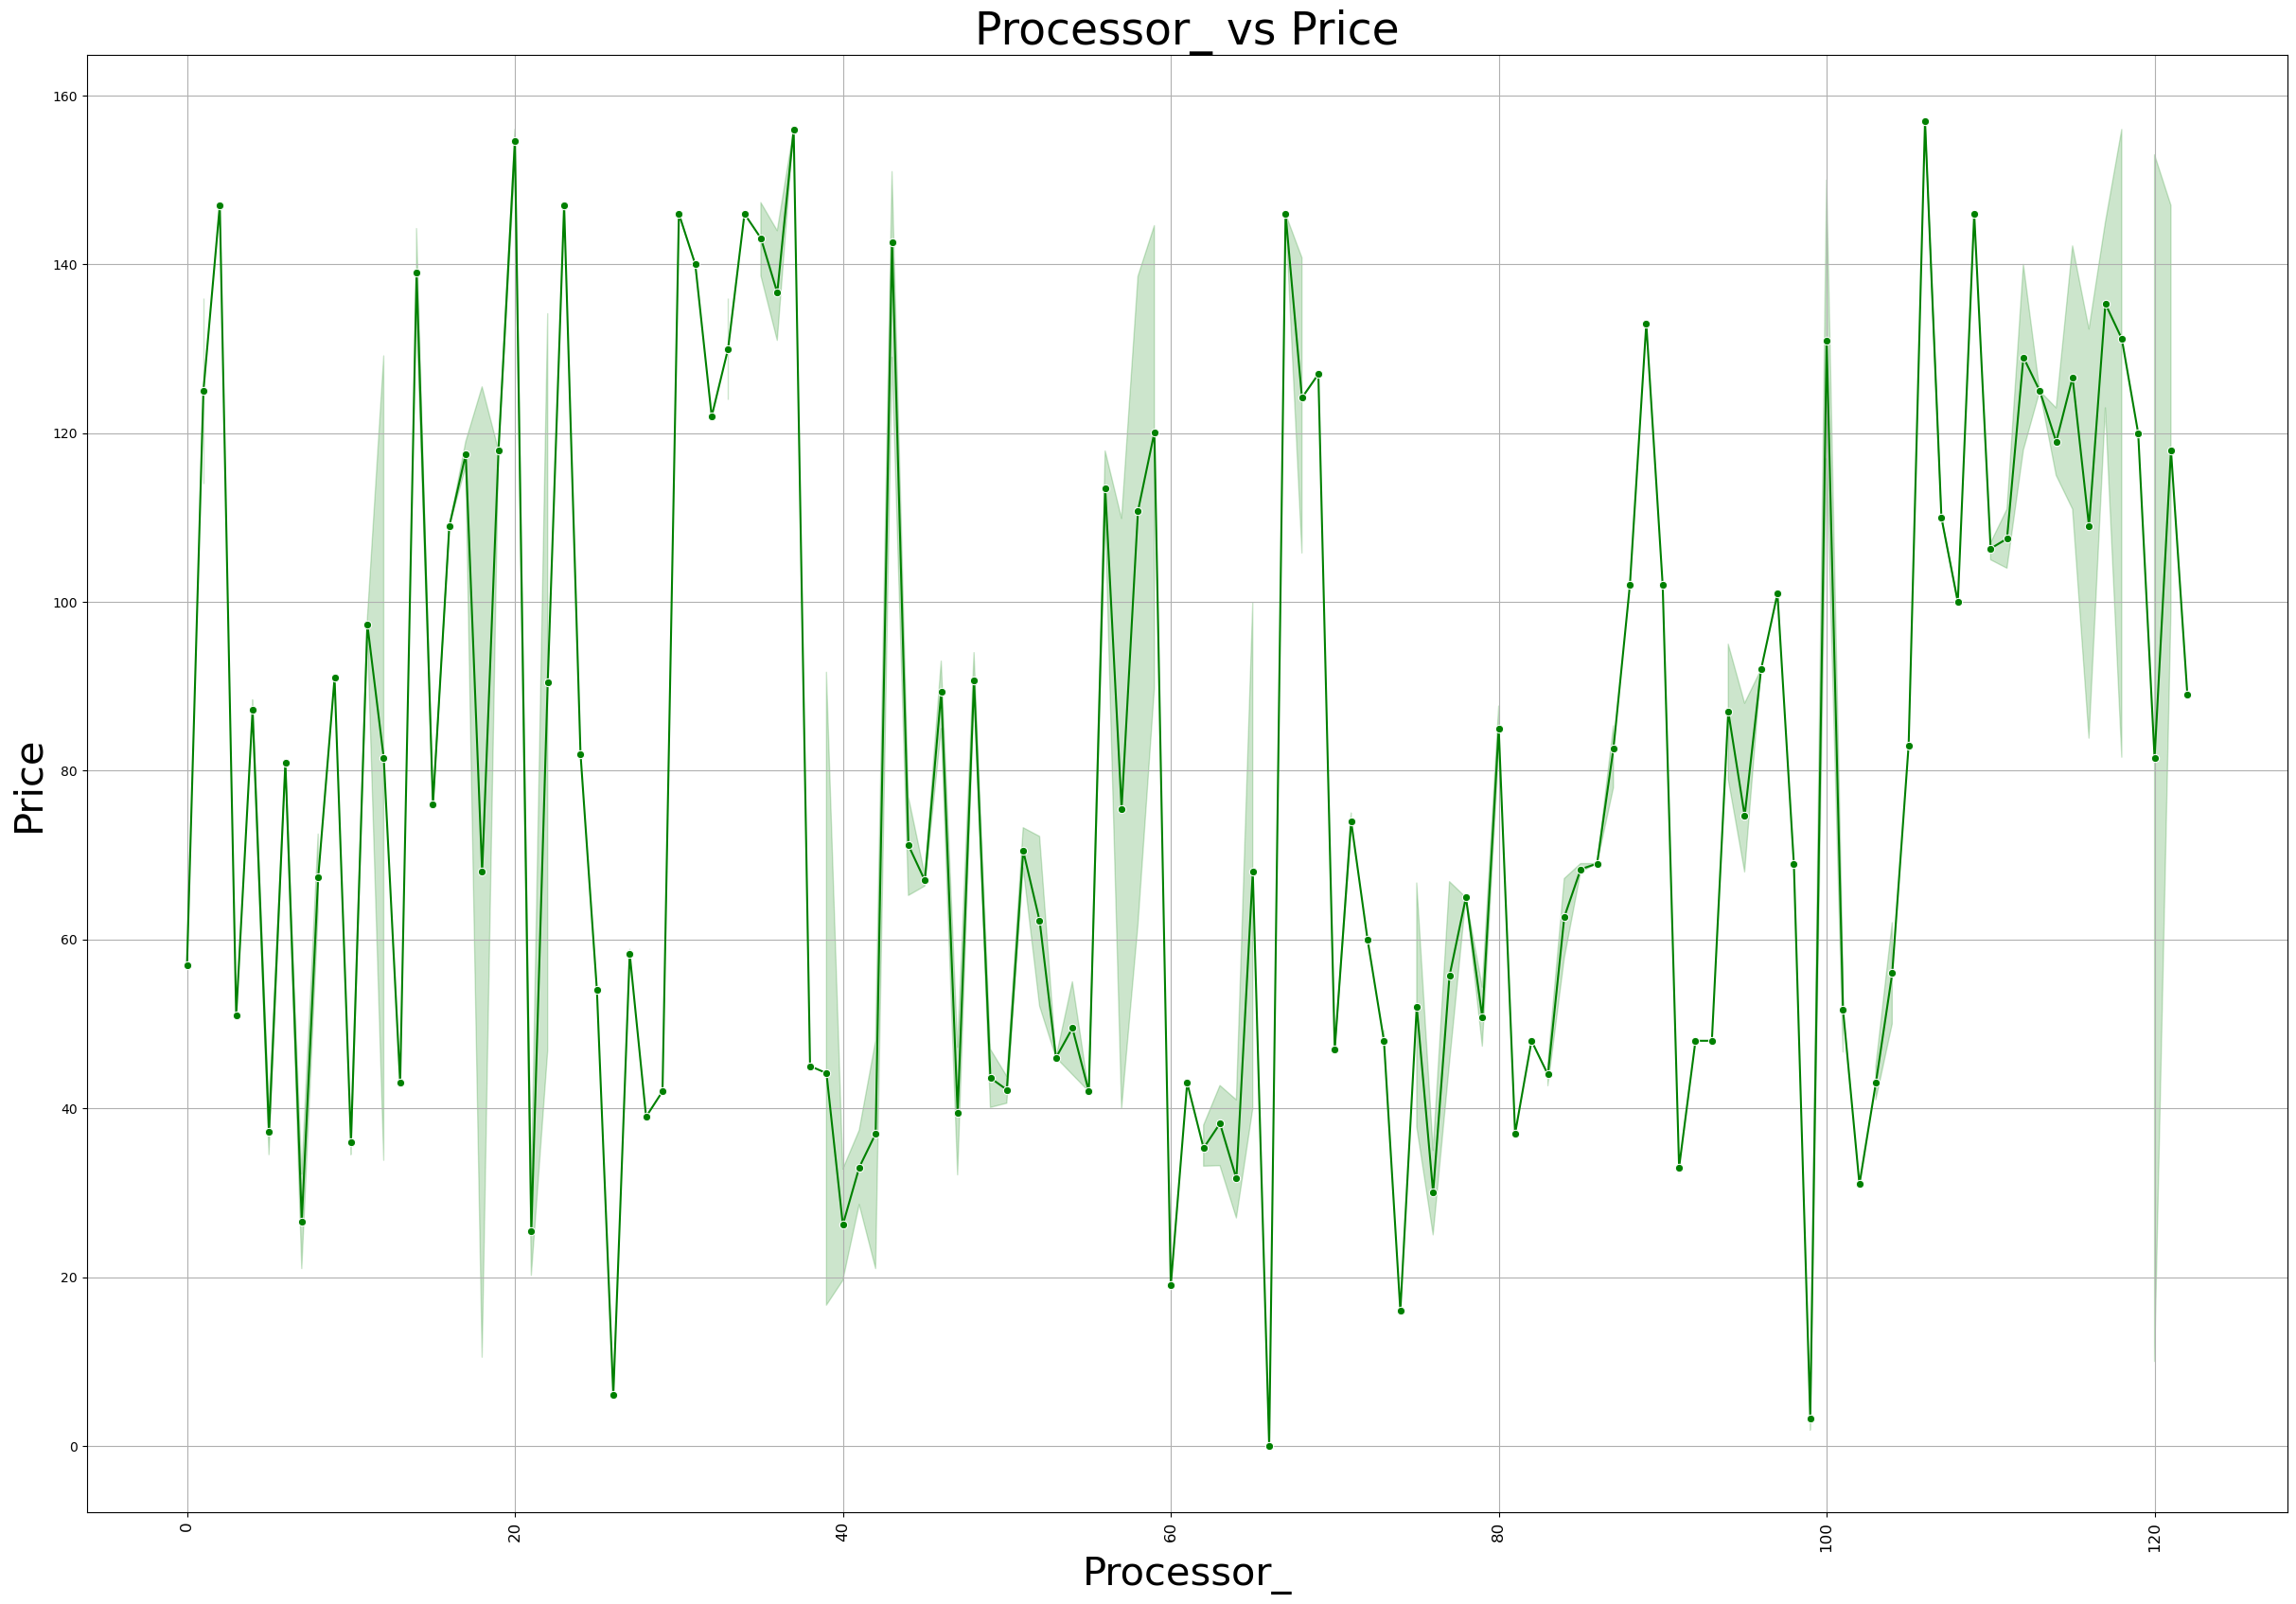

In [173]:
plt.figure(figsize=(30, 20))
sns.lineplot(x='Processor_', y='Prize', data=df, color='green', marker='o')
plt.xlabel('Processor_',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.xticks(rotation=90, fontsize=12)
plt.xlim()  
plt.ylim()
plt.title('Processor_ vs Price', fontsize=34)
plt.grid(True)
plt.show()

In [66]:
# X-axis (Processor Types): Different processors used in devices.
# Y-axis (Price in Currency Units): Price of devices corresponding to each processor.
#  Green Line with Shaded Region: Represents the price trend and variability for each processor.
# High Variability: The price fluctuates significantly across different processors, 
# indicating that price is influenced by multiple factors beyond just the processor type.
# Dense Data Representation: The X-axis contains many processor names, making readability difficult.
# No Clear Trend: Some high-end processors correspond to lower prices, while some mid-range processors have higher price variance.

# Feature Extraction

In [67]:
# Battery Efficiency: We can create a feature battery_efficiency by dividing the battery capacity by the RAM (or Memory)
# to check how efficient the battery is relative to the device's power requirements
# Assuming df contains the columns 'Battery_' and 'RAM'
# Compute Battery Efficiency (Battery per RAM)
df['battery_efficiency'] = df['Battery_'] / df['RAM']

In [68]:
# Camera Quality Ratio: A ratio between the rear and front camera can give insight into the balance between the two
# df['camera_quality_ratio'] = df['Rear Camera'] / df['Front Camera']

# Price-to-RAM Ratio: Creating a price-to-RAM ratio can help indicate how much value (price) is given to the amount of RAM
# df['price_per_ram'] = df['Price'] / df['RAM']

# Price-to-Memory Ratio: A similar feature can be created by dividing the price by the memory
# df['price_per_memory'] = df['Price'] / df['Memory']

In [69]:
# Convert camera resolution (e.g., '13MP') to integer (e.g., 13)
df['Rear_Camera_MP'] = df['Rear Camera'].str.replace('MP', '').astype(int)
df['Front_Camera_MP'] = df['Front Camera'].str.replace('MP', '').astype(int)

# Calculate the camera quality ratio
# df['camera_quality_ratio'] = df['Rear_Camera_MP'] / df['Front_Camera_MP']

# View the resulting DataFrame with the new feature
print(df[['Rear Camera', 'Front Camera', 'RAM']])

    Rear Camera Front Camera  RAM
2          50MP         16MP  8.0
3           8MP          5MP  2.0
14         13MP          5MP  4.0
15          8MP          5MP  4.0
17          8MP          5MP  4.0
..          ...          ...  ...
534        50MP          8MP  4.0
535        13MP          5MP  3.0
538        50MP          8MP  4.0
539        50MP         32MP  8.0
540        50MP          8MP  4.0

[328 rows x 3 columns]


In [70]:
# Ensure 'Price' and 'RAM' are numeric
df['Prize'] = pd.to_numeric(df['Prize'], errors='coerce')
df['RAM'] = pd.to_numeric(df['RAM'], errors='coerce')

In [71]:
# Calculate price per RAM
df['Prize_per_ram'] = df['Prize'] / df['RAM']

In [72]:
# Calculate price per memory
df['prize_per_memory'] = df['Prize'] / df['Memory']

In [73]:
def extract_brand(model_name):
    if pd.isna(model_name):  # Handle NaN values
        return None
    return model_name.split()[0]

def extract_series(model_name):
    if pd.isna(model_name):  # Handle NaN values
        return None
    parts = model_name.split()
    return parts[1] if len(parts) > 1 else None  # Return None if there's only one word

# Apply functions to extract brand and series
df['Brand'] = df['Model'].apply(extract_brand)
df['Series'] = df['Model'].apply(extract_series)


In [74]:
import pandas as pd

# Function to extract brand (first word of Model)
def extract_brand(model_name):
    if isinstance(model_name, str):  # Check if it's a valid string
        return model_name.split()[0]
    return None  # Handle cases where model_name is NaN or not a string

# Function to extract series (second word of Model, if available)
def extract_series(model_name):
    if isinstance(model_name, str):
        parts = model_name.split()
        return parts[1] if len(parts) > 1 else None  # Return second word if exists
    return None

# Apply the functions to the DataFrame
df['Brand'] = df['Model'].apply(extract_brand)
df['Series'] = df['Model'].apply(extract_series)

# Display the updated DataFrame
print(df[['Model', 'Brand', 'Series']])


                     Model     Brand  Series
2             MOTOROLA G32  MOTOROLA     G32
3                 POCO C50      POCO     C50
14      SAMSUNG Galaxy F04   SAMSUNG  Galaxy
15                POCO C51      POCO     C51
17                POCO C51      POCO     C51
..                     ...       ...     ...
534         Nokia G11 Plus     Nokia     G11
535    SAMSUNG Galaxy A04e   SAMSUNG  Galaxy
538         Tecno Spark 8T     Tecno   Spark
539  SAMSUNG Galaxy A54 5G   SAMSUNG  Galaxy
540               OPPO A77      OPPO     A77

[328 rows x 3 columns]


In [75]:
import re

def extract_number(model_name):
    if isinstance(model_name, str):  # Ensure model_name is a string
        match = re.search(r'\d+', model_name)  # Find the first number in the string
        if match:
            return int(match.group())  # Convert the extracted number to an integer
    return None  # Return None if no number is found or model_name is not a string

# Apply the function to extract model numbers
df['Model_Number'] = df['Model'].apply(extract_number)

# Display the first two rows of the DataFrame
df.head(2)


Model        Colour  Memory  RAM  Battery_ Rear Camera Front Camera  \
2  MOTOROLA G32  Mineral Gray   128.0  8.0    5000.0        50MP         16MP   
3      POCO C50    Royal Blue    32.0  2.0    5000.0         8MP          5MP   

   AI Lens  Mobile Height               Processor_  Prize  battery_efficiency  \
2      0.0          16.64  Qualcomm Snapdragon 680    NaN               625.0   
3      0.0          16.56       Mediatek Helio A22    NaN              2500.0   

   Rear_Camera_MP  Front_Camera_MP  Prize_per_ram  prize_per_memory     Brand  \
2              50               16            NaN               NaN  MOTOROLA   
3               8                5            NaN               NaN      POCO   

  Series  Model_Number  
2    G32            32  
3    C50            50

In [100]:
### Explore Categorical Variables
## 2. Data Preprocessing

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you have a pandas DataFrame called df
# Let's create a sample dataframe for illustration purposes

df = pd.DataFrame(df)

# List of categorical columns to encode
categorical_columns = ['Colour', 'Processor_', 'Brand', 'Series']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Print the transformed DataFrame
print(df)


                     Model  Colour  Memory  RAM  Battery_ Rear Camera  \
2             MOTOROLA G32     101   128.0  8.0    5000.0        50MP   
3                 POCO C50     134    32.0  2.0    5000.0         8MP   
14      SAMSUNG Galaxy F04     110    64.0  4.0    5000.0        13MP   
15                POCO C51     134    64.0  4.0    5000.0         8MP   
17                POCO C51     122    64.0  4.0    5000.0         8MP   
..                     ...     ...     ...  ...       ...         ...   
534         Nokia G11 Plus      64    64.0  4.0    5000.0        50MP   
535    SAMSUNG Galaxy A04e      79    64.0  3.0    5000.0        13MP   
538         Tecno Spark 8T     168    64.0  4.0    5000.0        50MP   
539  SAMSUNG Galaxy A54 5G      12   128.0  8.0    5000.0        50MP   
540               OPPO A77     142   128.0  4.0    5000.0        50MP   

    Front Camera  AI Lens  Mobile Height  Processor_  Prize  \
2           16MP      0.0          16.64          48    NaN 

# Model Building

In [120]:
# Handle categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
# Define features and target variable
X = df.drop(columns=['Prize'])  # Assuming 'Price' is the target variable
y = df['Prize']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("Model Evaluation:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")


Model Evaluation:
Mean Absolute Error: 12.834128440366971
Mean Squared Error: 565.165504587156
Root Mean Squared Error: 23.773209808251725
R-squared Score: 0.7504240225763976


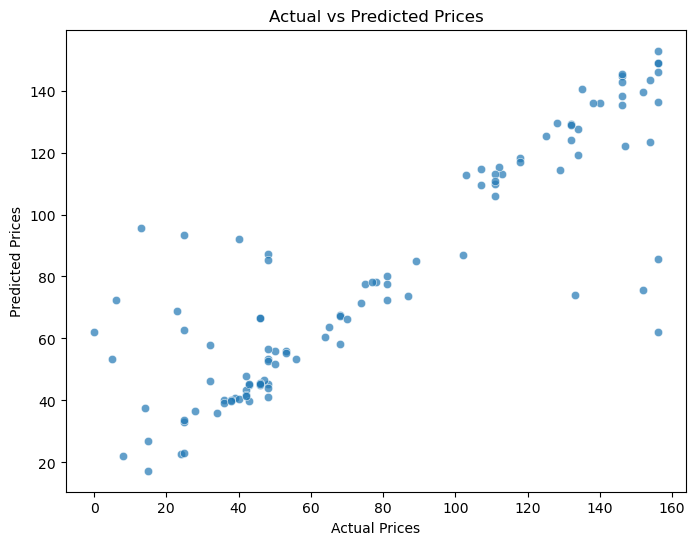

In [123]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [169]:
# The clustering along an upward diagonal indicates the model captures the overall price pattern well.
# Some points deviate significantly from the trend, suggesting occasional mispredictions.
# Wider spread at higher price ranges could indicate inconsistencies in feature importance.
# A tight clustering along an ideal 45-degree line would indicate near-perfect predictions.
# The scatter spread suggests further optimization is needed—possible improvements include feature selection, 
#hyperparameter tuning, or using a more complex model.

# Create and train Linear Regression model

In [131]:
model2 = LinearRegression()
model2.fit(x_train, y_train)

# Make predictions
y_pred = model2.predict(x_test)

# Get model score
score = model2.score(x_test, y_test)
print(f'Model Score: {score}')


Model Score: -0.009287527791745243


# Calculate evaluation metrics

In [133]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 0.07739475602440544
R-squared: -0.009287527791745243
Mean Absolute Error: 0.23911667187884406


# Create Lasso Regression

In [134]:
# Ensure x_train and y_train are defined before running this
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))  # Set the random state for reproducibility
feature_sel_model.fit(x_train, y_train)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [138]:
feature_sel_model.get_support()

array([False])

In [139]:
# Ensure x_train and y_train are defined before running this
lasso = Lasso(alpha=0.01)  # Example alpha value, adjust based on your needs
lasso.fit(x_train, y_train)

# Use SelectFromModel for feature selection
feature_sel_model = SelectFromModel(lasso, threshold="mean", max_features=10, prefit=True)
x_train_selected = feature_sel_model.transform(x_train)

# Ensure x_train is a DataFrame before selecting column names
if isinstance(x_train, pd.DataFrame):
    selected_feat = x_train.columns[feature_sel_model.get_support()]
else:
    selected_feat = np.where(feature_sel_model.get_support())[0]  # Use index positions if x_train is not a DataFrame

# Print some stats
print('Total features: {}'.format(x_train.shape[1]))  # Total features in the data
print('Selected features: {}'.format(len(selected_feat)))  # Number of selected features

# Print how many coefficients are zero
print('Features with coefficients shrank to zero: {}'.format(np.sum(lasso.coef_ == 0)))


Total features: 1
Selected features: 1
Features with coefficients shrank to zero: 1


In [140]:
# Ensure x_train, y_train, and x_test are defined before running this
model3 = Lasso(alpha=0.01)  # Set an alpha value (adjust as needed)

# Train the model
model3.fit(x_train, y_train)

# Predicting values using the trained model
model3_pred = model3.predict(x_test)

# Displaying the predicted values
print('Predicted values:', model3_pred)


Predicted values: [0.51105866 0.51105866 0.51105866 0.51105866 0.51105866 0.51105866
 0.51105866 0.51105866 0.51105866 0.51105866 0.51105866 0.51105866
 0.51105866 0.51105866 0.51105866 0.51105866 0.51105866 0.51105866
 0.51105866 0.51105866]


In [142]:
# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, model3_pred)
print('Mean Squared Error:', mse)

# Calculate and print the R-squared score
r2 = r2_score(y_test, model3_pred)
print('R-squared:', r2)

# Calculate and print the Mean Absolute Error
mae = mean_absolute_error(y_test, model3_pred)
print('Mean Absolute Error:', mae)


Mean Squared Error: 0.07784434702957714
R-squared: -0.015150542515689258
Mean Absolute Error: 0.2405126384694439


# Creating the Decision Tree Regressor model

In [143]:
model4 = DecisionTreeRegressor(random_state=42)

# Ensure x_train and y_train are defined before fitting
model4.fit(x_train, y_train)

# Model is now trained and ready for predictions


DecisionTreeRegressor(random_state=42)

In [145]:
# Make predictions using the trained Decision Tree model
y_pred = model4.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print all evaluation metrics
print(f'Model Score: {model4.score(x_test, y_test)}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Model Score: -1.0265318569368715
Mean Squared Error: 0.15539965998240018
R-squared: -1.0265318569368715
Mean Absolute Error: 0.33869807280219655


In [147]:
# Train SVM Regressor with specified hyperparameters
model5 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Fit the model to the training data
model5.fit(x_train, y_train)


SVR(C=100, gamma=0.1)

In [148]:
# Predicting
model5_pred = model5.predict(x_test)

# Evaluating model performance

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, model5_pred)
print('Mean Squared Error:', mse)

# Calculate and print the R-squared score
r2 = r2_score(y_test, model5_pred)
print('R-squared:', r2)

# Calculate and print the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, model5_pred)
print('Mean Absolute Error:', mae)


Mean Squared Error: 0.09266908908818564
R-squared: -0.20847665440064778
Mean Absolute Error: 0.2608270357938136


In [149]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Train Model
model6 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model6.fit(x_train, y_train)

# Predict
model6_pred = model6.predict(x_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, model6_pred)
r2 = r2_score(y_test, model6_pred)
mae = mean_absolute_error(y_test, model6_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 0.11019556022015811
R-squared: -0.4370354047392859
Mean Absolute Error: 0.2653307225598743


In [151]:
# Define and train the KNN model
model17 = KNeighborsRegressor(n_neighbors=5)  # You can tune 'n_neighbors' for better performance
model17.fit(x_train, y_train)

# Predict on test data
model17_pred = model17.predict(x_test)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, model17_pred)
print('Mean Squared Error:', mse)

# Calculate and print the R-squared score
r2 = r2_score(y_test, model17_pred)
print('R-squared:', r2)

# Calculate and print the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, model17_pred)
print('Mean Absolute Error:', mae)


Mean Squared Error: 0.0846987684406533
R-squared: -0.10453750354243274
Mean Absolute Error: 0.23548148591324863


In [155]:
# List of model names
models = ['Random Forest', 'Linear Regression', 'Lasso', 'Decision Tree', 'SVR', 
          'GradientBoostingRegressor', 'KNeighborsRegressor']

# MAE, RMSE, and MSE values
mae_values = [4106002.521775229, 22086138.91620762, 22056313.5782761, 5934833.385321101,
              136589844.6718914, 1653298.4781796904, 28983272.096880734]

rmse_values = [0.967655538981604, 0.8260544294012087, 0.9532491678955372, 
               -0.07596767774884428, 0.986763690817142, 0.7716882682855766, 0.85]  # Ensure same length

mse_values = [781.754776042202, 2090.5880933882893, 2089.0712514199723, 
              709.7522935779816, 7624.831449952067, 750.7423482793979, 1473.1633027522935]

# Debugging: Print lengths to check for mismatches
print("Lengths of Lists:")
print("Models:", len(models))
print("MAE Values:", len(mae_values))
print("RMSE Values:", len(rmse_values))
print("MSE Values:", len(mse_values))

# Ensure all lists have the same length before creating DataFrame
if len(models) == len(mae_values) == len(rmse_values) == len(mse_values):
    model_comparison = pd.DataFrame({'Model': models, 'MAE': mae_values, 'RMSE': rmse_values, 'MSE': mse_values})
    
    # Display the model comparison table
    print(model_comparison)

    # Find the best model based on MAE
    best_model = model_comparison.loc[model_comparison["MAE"].idxmin()]  # Finds the model with the lowest MAE

    print("\nBest Model based on MAE and RMSE:")
    print(best_model)
else:
    print("Error: The lists do not have the same length! Please check your data.")


Lengths of Lists:
Models: 7
MAE Values: 7
RMSE Values: 7
MSE Values: 7
                       Model           MAE      RMSE          MSE
0              Random Forest  4.106003e+06  0.967656   781.754776
1          Linear Regression  2.208614e+07  0.826054  2090.588093
2                      Lasso  2.205631e+07  0.953249  2089.071251
3              Decision Tree  5.934833e+06 -0.075968   709.752294
4                        SVR  1.365898e+08  0.986764  7624.831450
5  GradientBoostingRegressor  1.653298e+06  0.771688   750.742348
6        KNeighborsRegressor  2.898327e+07  0.850000  1473.163303

Best Model based on MAE and RMSE:
Model    GradientBoostingRegressor
MAE                  1653298.47818
RMSE                      0.771688
MSE                     750.742348
Name: 5, dtype: object


In [156]:
df.head(2)

Unnamed: 0  Model  Colour  Memory  RAM  Battery_  Rear Camera  \
0           0     23     159      64    4      6000            3   
1           1     23      20      64    4      6000            3   

   Front Camera  AI Lens  Mobile Height  Processor_  Prize  
0            10        1          16.76         113    125  
1            10        1          16.76         113    125

In [160]:
# Ensure correct column names
expected_columns = ['Rear_Camera_MP', 'Front_Camera_MP', 'Brand', 'Series', 
                    'Model_Number', 'battery_efficiency', 'Colour', 'Mobile_Height']

# Filter existing columns to avoid KeyError
available_columns = [col for col in expected_columns if col in df.columns]

# Define features (X) and target (Y)
X = df[available_columns]  # Use only available columns
Y = df['Prize']  # Ensure column name is correct

# Encode categorical variables
categorical_cols = ['Brand', 'Series', 'Model_Number', 'Colour']
label_encoders = {}

for col in categorical_cols:
    if col in X.columns:  # Encode only if column exists
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le  # Store encoder for later use

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=5, test_size=0.2)

# Train the model (Ensure model6 is defined before using)
model6.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=42)

In [165]:
# Example: Using only the first feature (modify accordingly)
new_data = np.array([[50]])  

# Predict
predicted_price = model6.predict(new_data)

# Print result
print(f'Predicted Mobile Price: {predicted_price[0]:,.2f}')


Predicted Mobile Price: 97.74


In [164]:
print(f"Model expects {X_train.shape[1]} features")


Model expects 1 features


# Model Evaluation

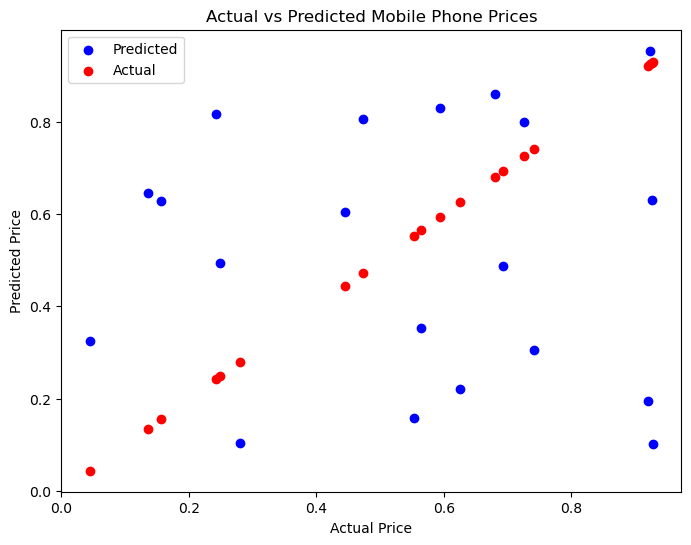

In [166]:
# Step 5.1: Evaluating Model Performance
plt.figure(figsize=(8, 6))

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted')  # Predicted vs Actual
plt.scatter(y_test, y_test, color='red', label='Actual')  # Actual vs Actual (Diagonal reference line)

# Labels and Title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.title('Actual vs Predicted Mobile Phone Prices')

# Show plot
plt.show()


In [170]:
# The red dots (actual prices) follow a near-diagonal pattern, indicating the true distribution.
# The blue dots (predicted prices) deviate from this ideal line, showing where the model makes errors.
# If predictions were perfect, all blue points would align with red points.
# he scattered blue points suggest inconsistencies, particularly in underestimating or overestimating certain values.
# A tight clustering along the diagonal would indicate high accuracy.
# The spread suggests the model may not have fully captured underlying pricing patterns.

# Feature Importance Analysis

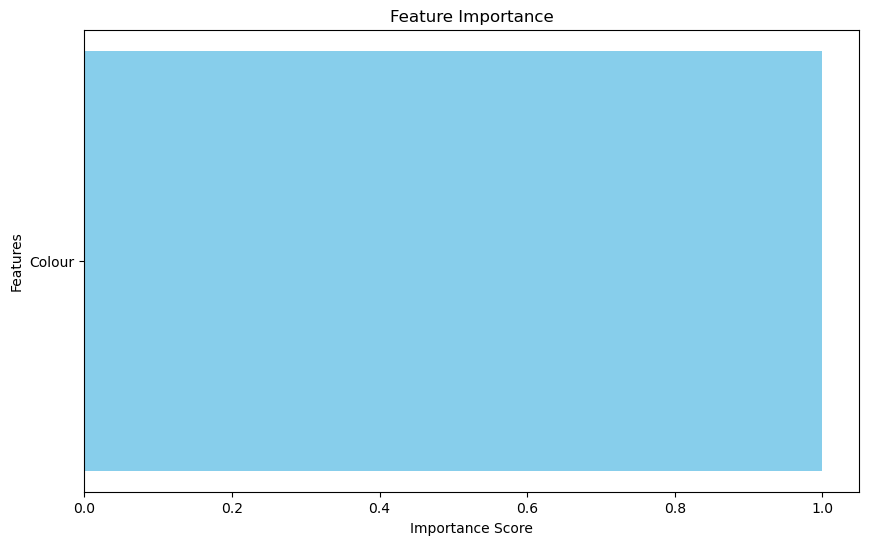

In [168]:
if hasattr(model6, "feature_importances_"):
    # Get feature importances
    importance = model6.feature_importances_
    feature_names = list(X.columns)  # Ensure it's a list
    
    # Sort features by importance (optional)
    indices = np.argsort(importance)  # Sort indices in ascending order
    feature_names = np.array(feature_names)[indices]
    importance = importance[indices]

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, importance, color='skyblue')  # Horizontal bar chart
    plt.title("Feature Importance")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()
else:
    print("The selected model does not support feature importance analysis.")


In [171]:
# The feature "Colour" is the only contributing factor, meaning the model relies solely on this feature to make predictions.
# This suggests that either the dataset lacks meaningful features or the model has overfitted to "Colour."
# Feature selection bias: Other relevant features may have been excluded or assigned zero importance.
# Data imbalance: If "Colour" is highly correlated with the target variable, the model might falsely assume it's the most critical factor.
# Overfitting risk: If "Colour" is not genuinely predictive, the model may not generalize well to new data.